In [16]:
import pandas as pd
import os

base_dir = "./inputs"
files = os.listdir(base_dir)
files

['bank-full.csv', 'sample_submission.csv', 'test.csv', 'train.csv']

In [7]:
df = pd.read_csv(os.path.join(base_dir, files[3])).set_index("id")
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
id,,,,,,,,,,,,,,,,,
0,42,technician,married,secondary,no,7,no,no,cellular,25,aug,117,3,-1,0,unknown,0
1,38,blue-collar,married,secondary,no,514,no,no,unknown,18,jun,185,1,-1,0,unknown,0
2,36,blue-collar,married,secondary,no,602,yes,no,unknown,14,may,111,2,-1,0,unknown,0
3,27,student,single,secondary,no,34,yes,no,unknown,28,may,10,2,-1,0,unknown,0
4,26,technician,married,secondary,no,889,yes,no,cellular,3,feb,902,1,-1,0,unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749995,29,services,single,secondary,no,1282,no,yes,unknown,4,jul,1006,2,-1,0,unknown,1
749996,69,retired,divorced,tertiary,no,631,no,no,cellular,19,aug,87,1,-1,0,unknown,0
749997,50,blue-collar,married,secondary,no,217,yes,no,cellular,17,apr,113,1,-1,0,unknown,0


In [4]:
df.isna().sum()

id           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [12]:
categories = df.select_dtypes(include=object).columns
non_categories = df.select_dtypes(exclude=object).columns

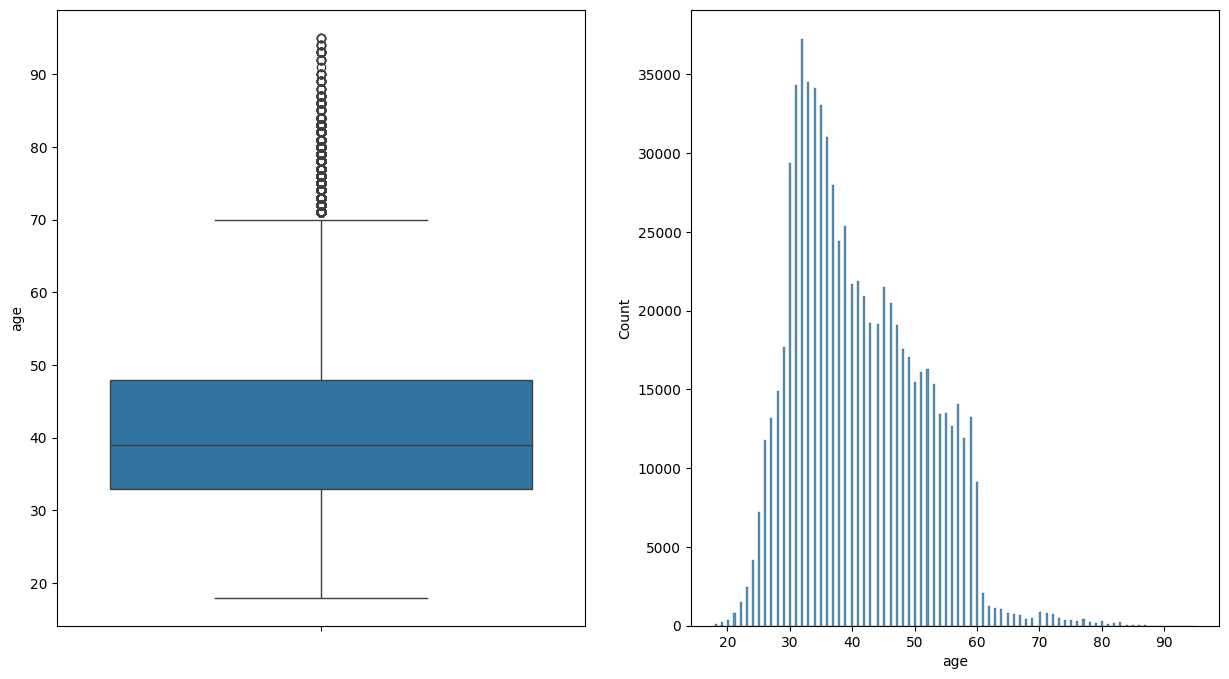

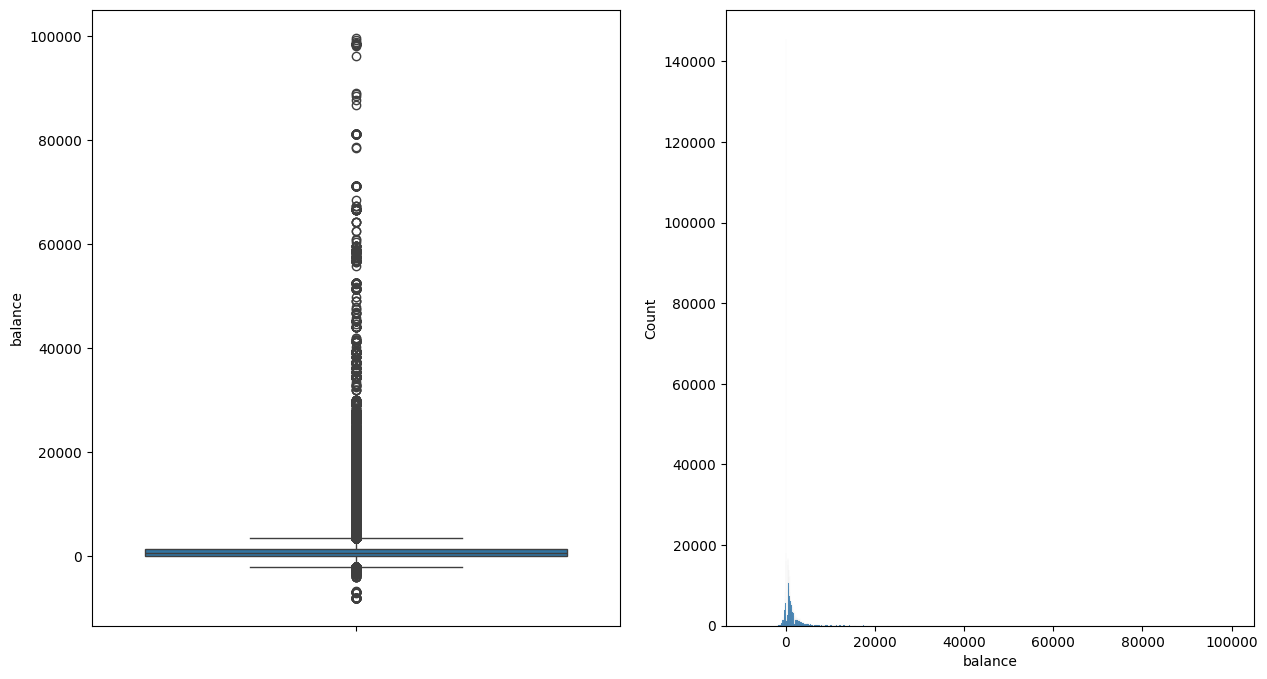

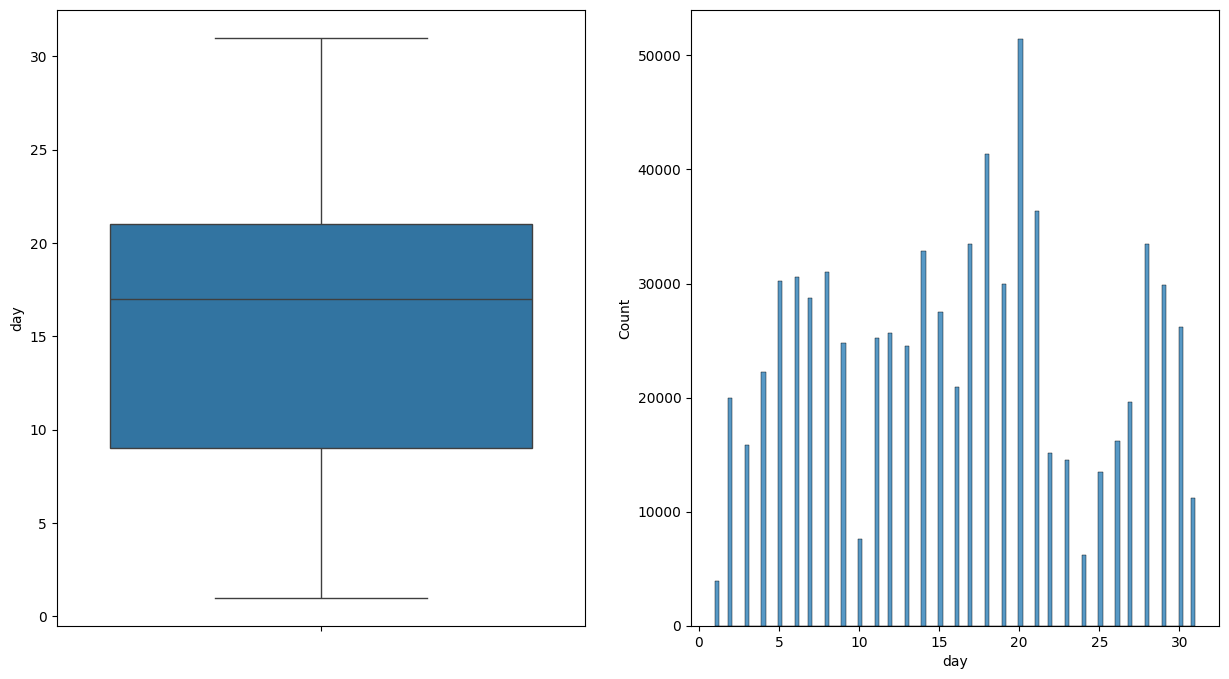

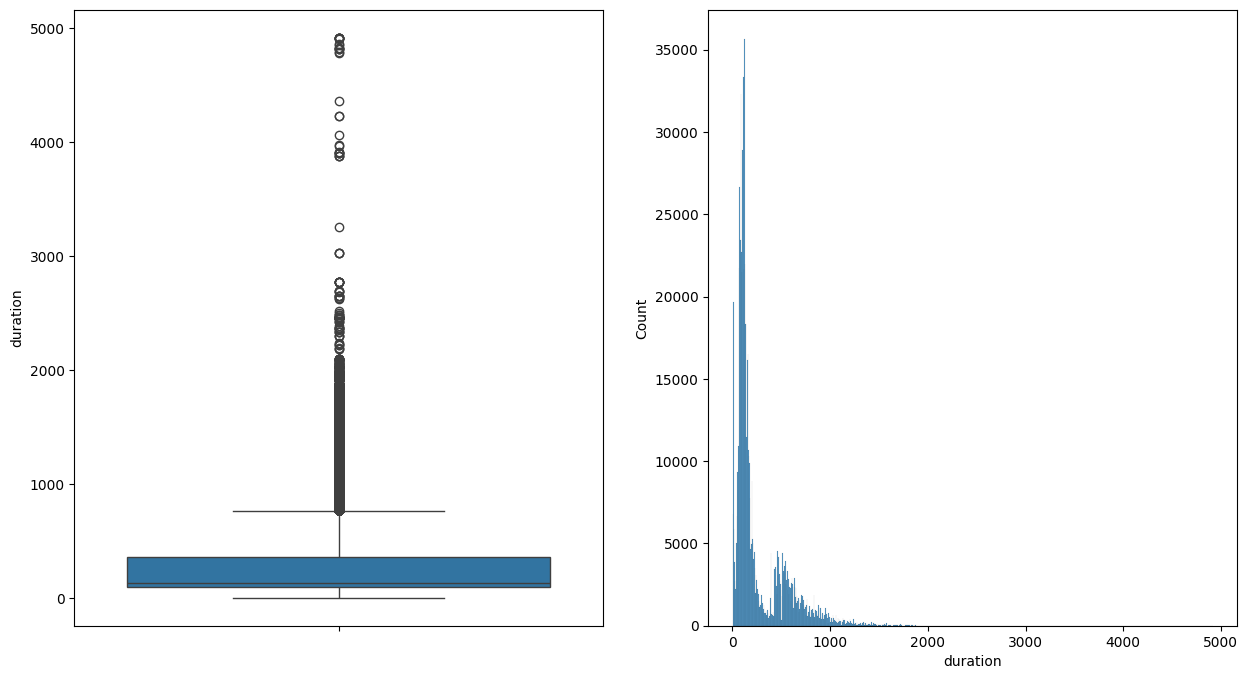

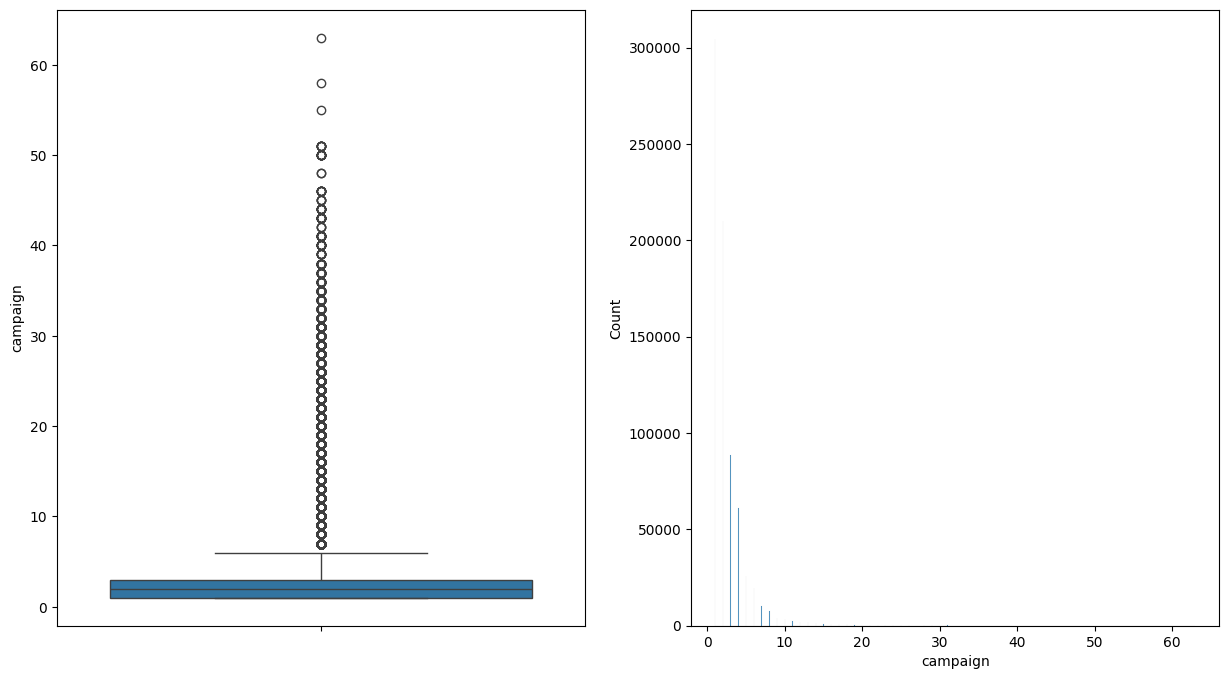

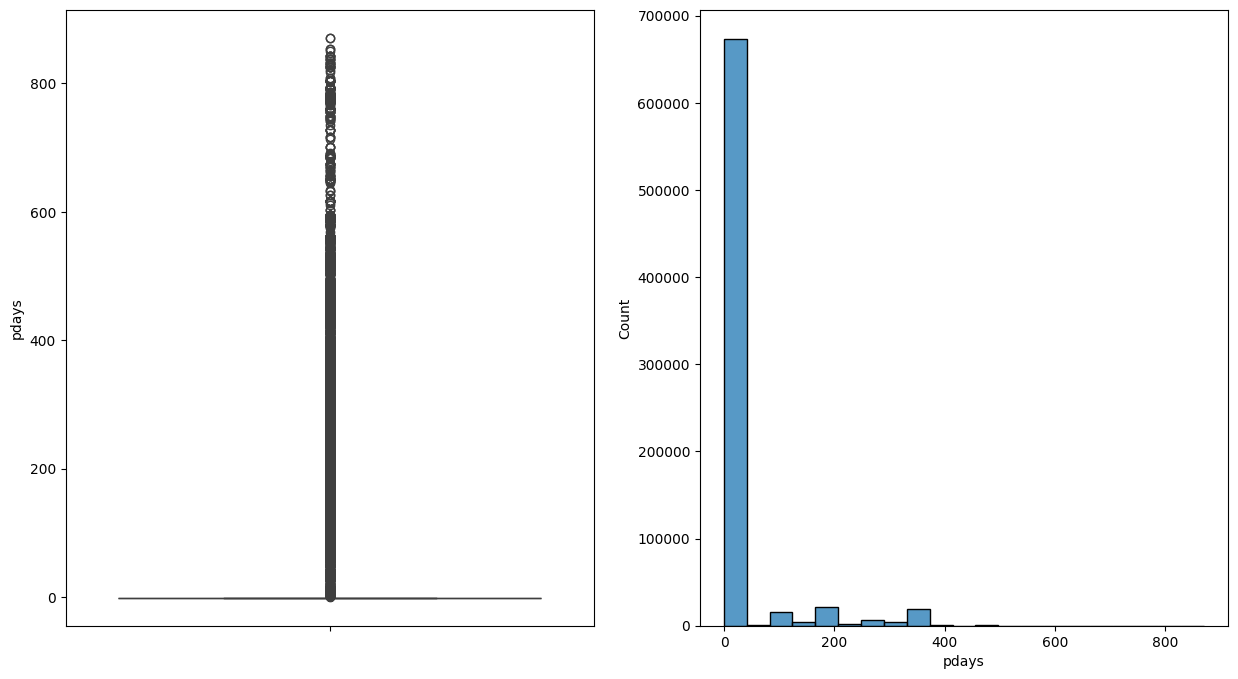

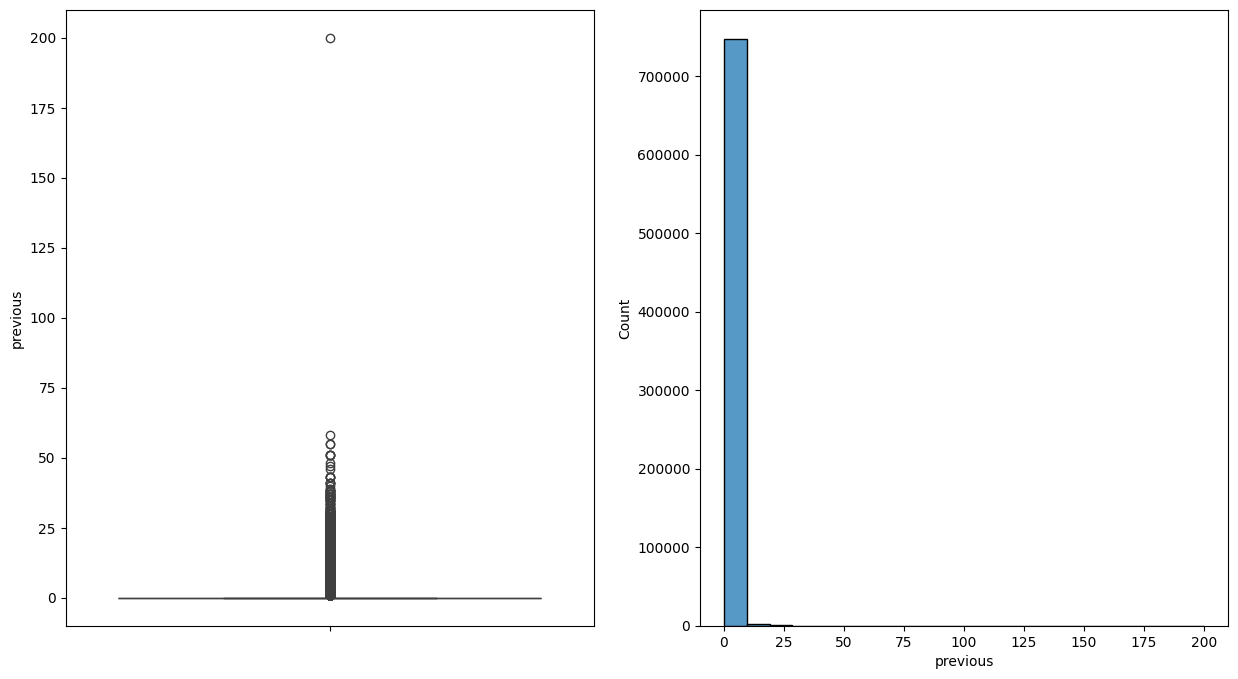

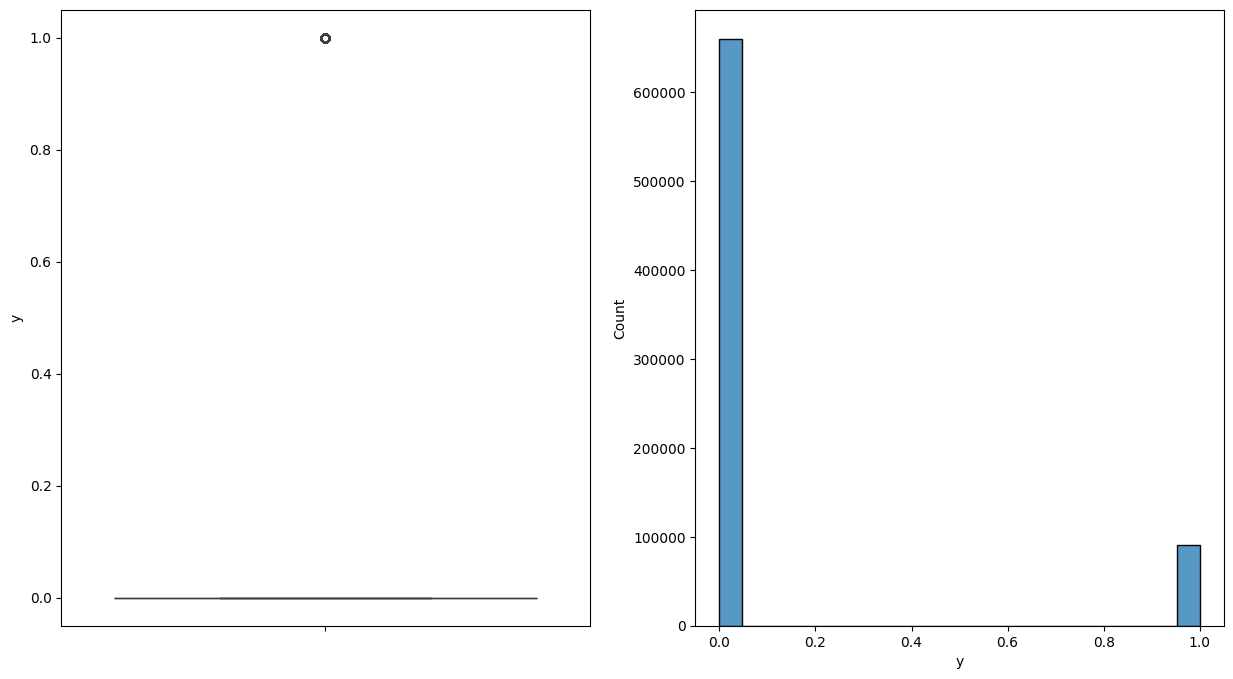

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

for column in non_categories:
    plt.figure(figsize=(15, 8))
    plt.subplot(1, 2, 1)
    sns.boxplot(data=df, y=column, )
    plt.subplot(1, 2, 2)
    sns.histplot(data=df, x=column, kde=False)
    plt.show()

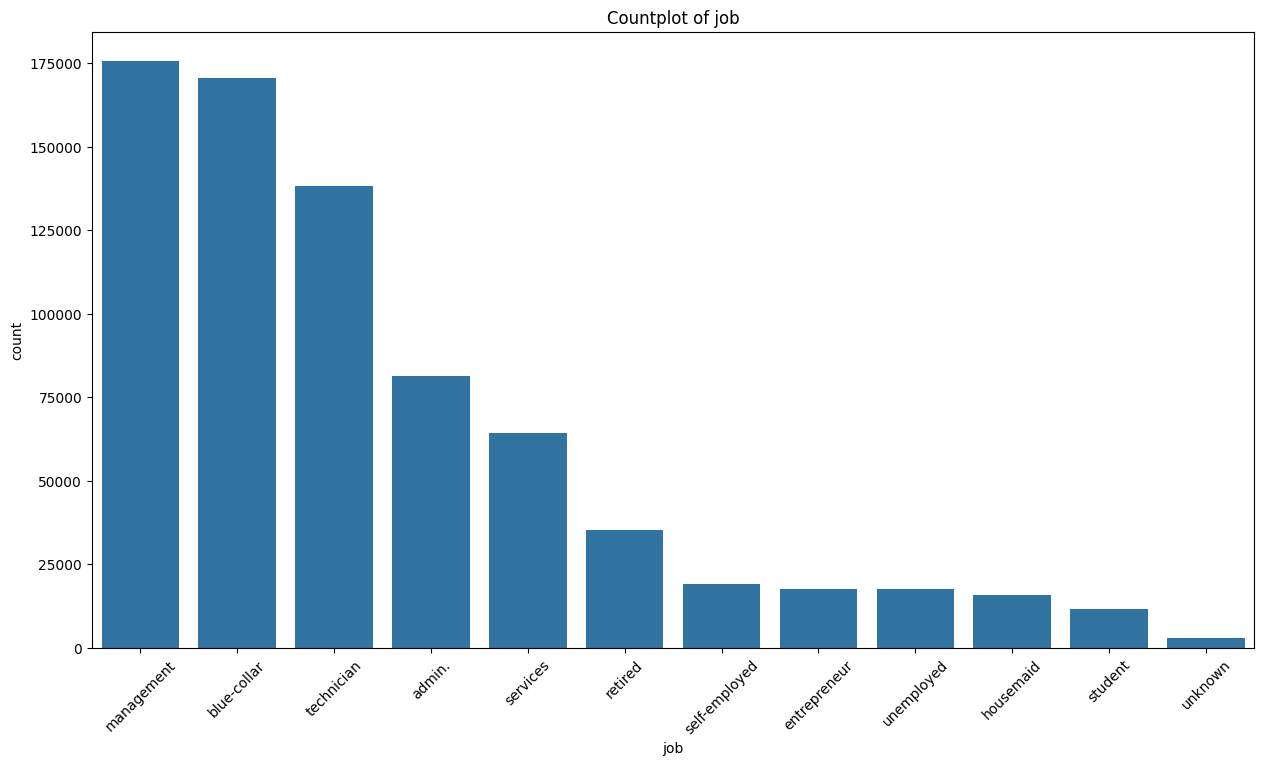

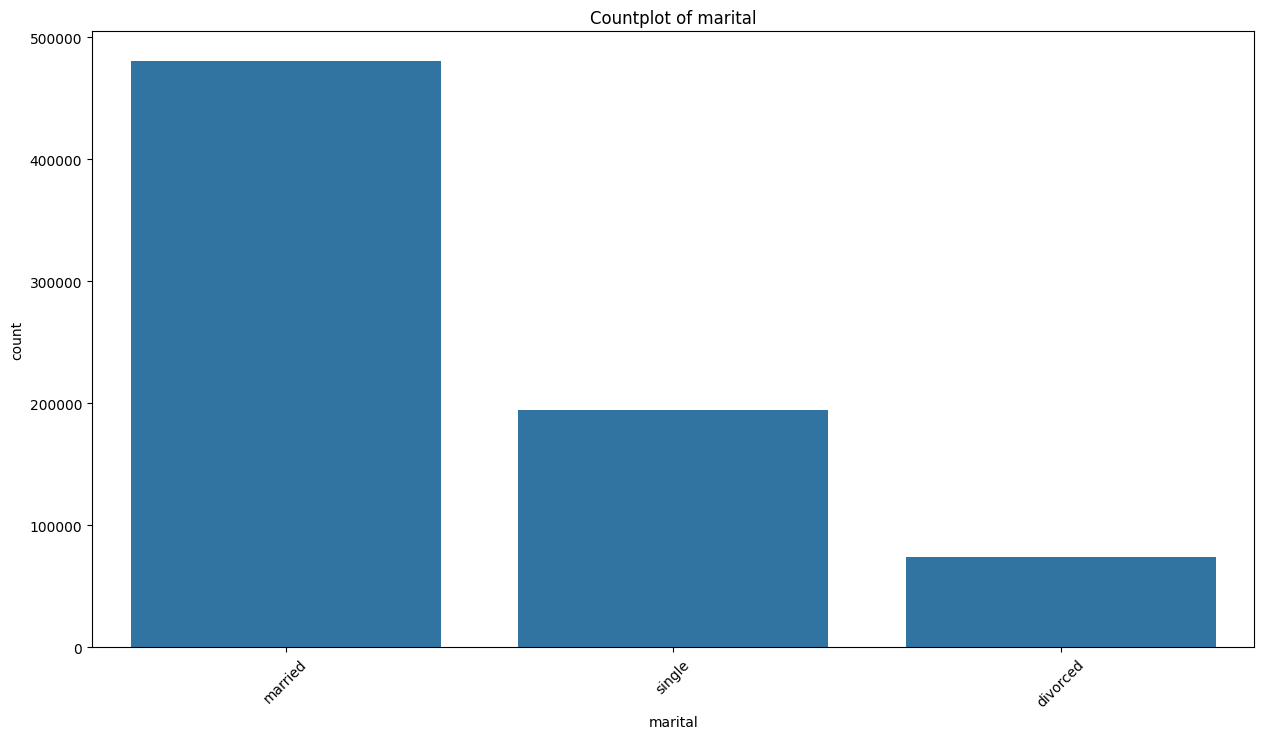

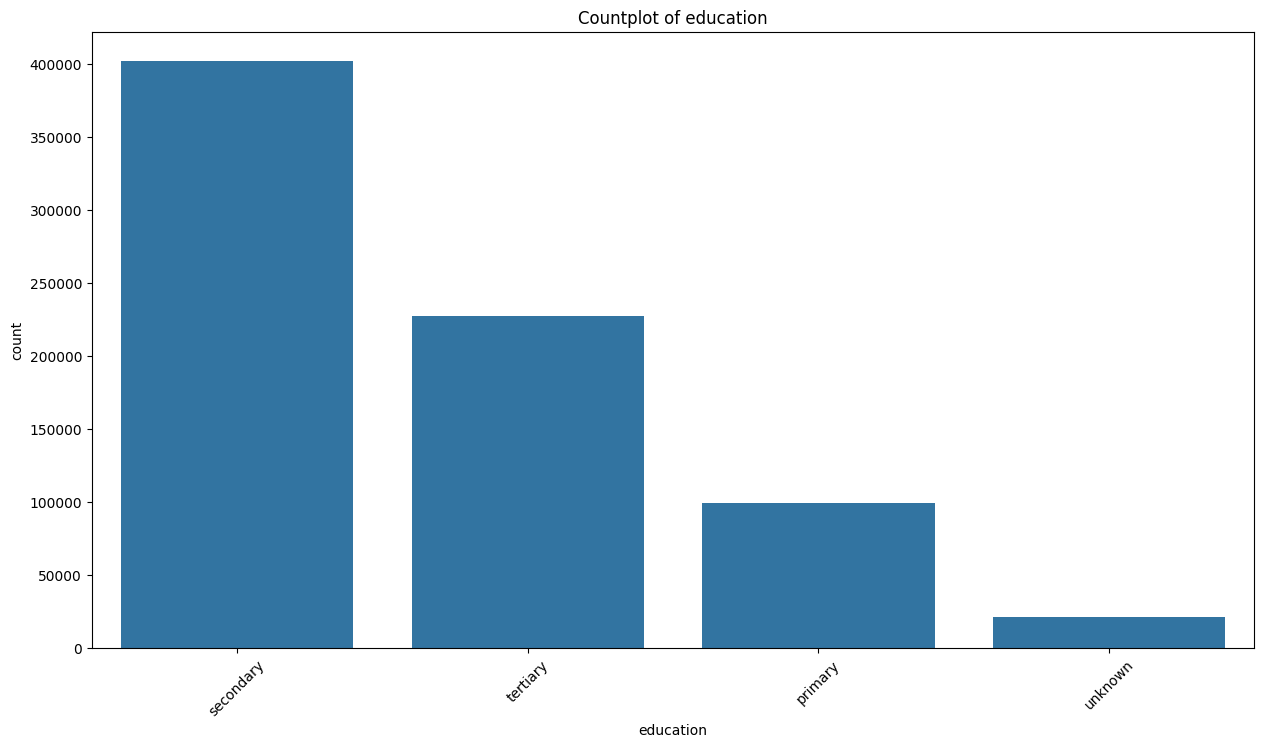

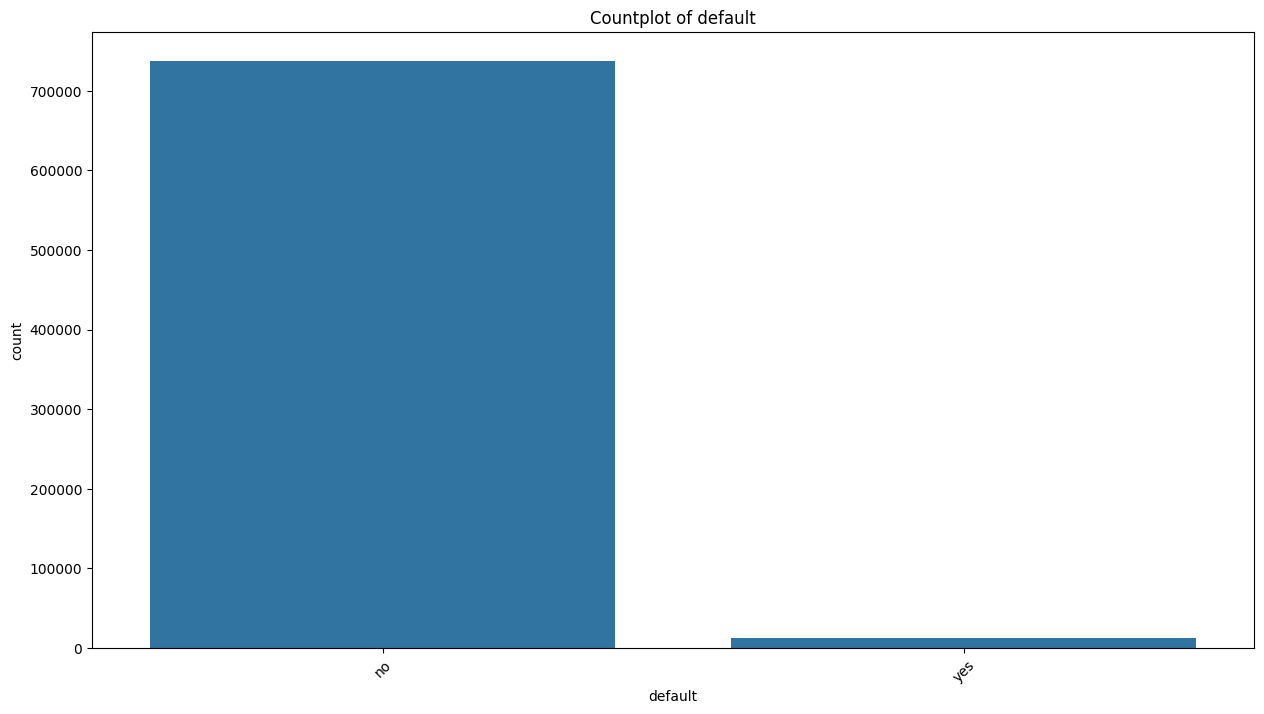

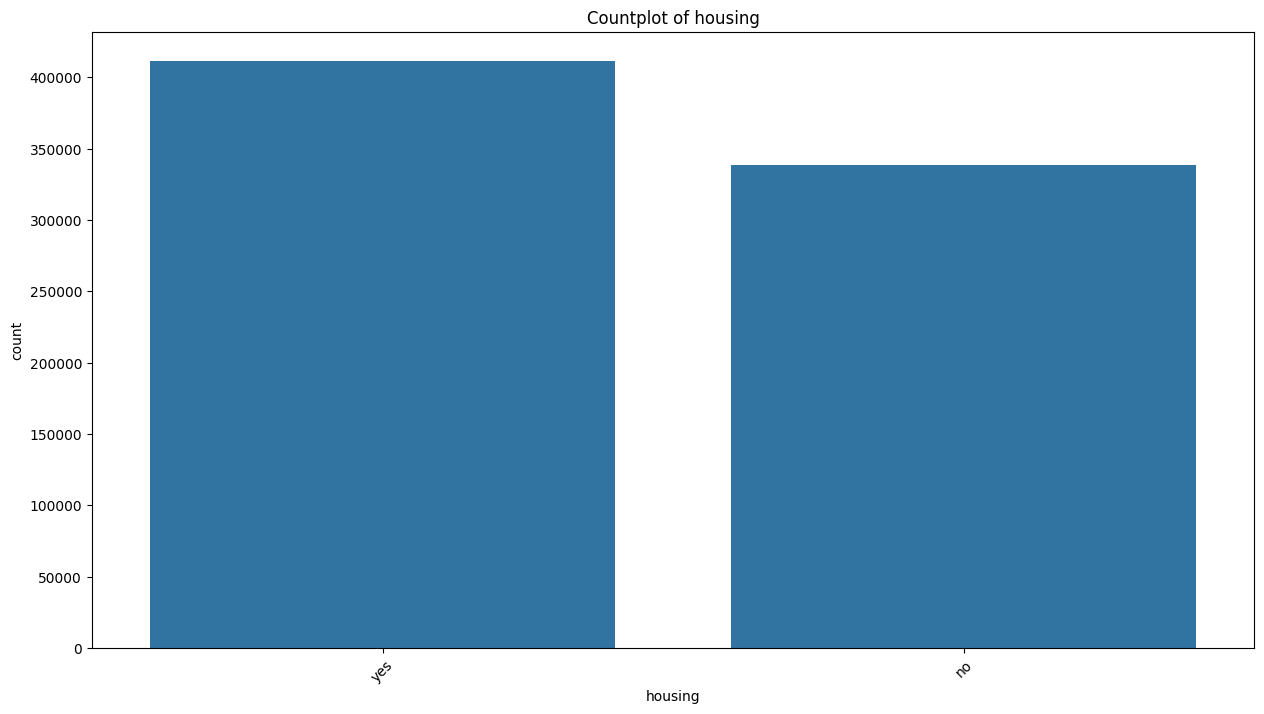

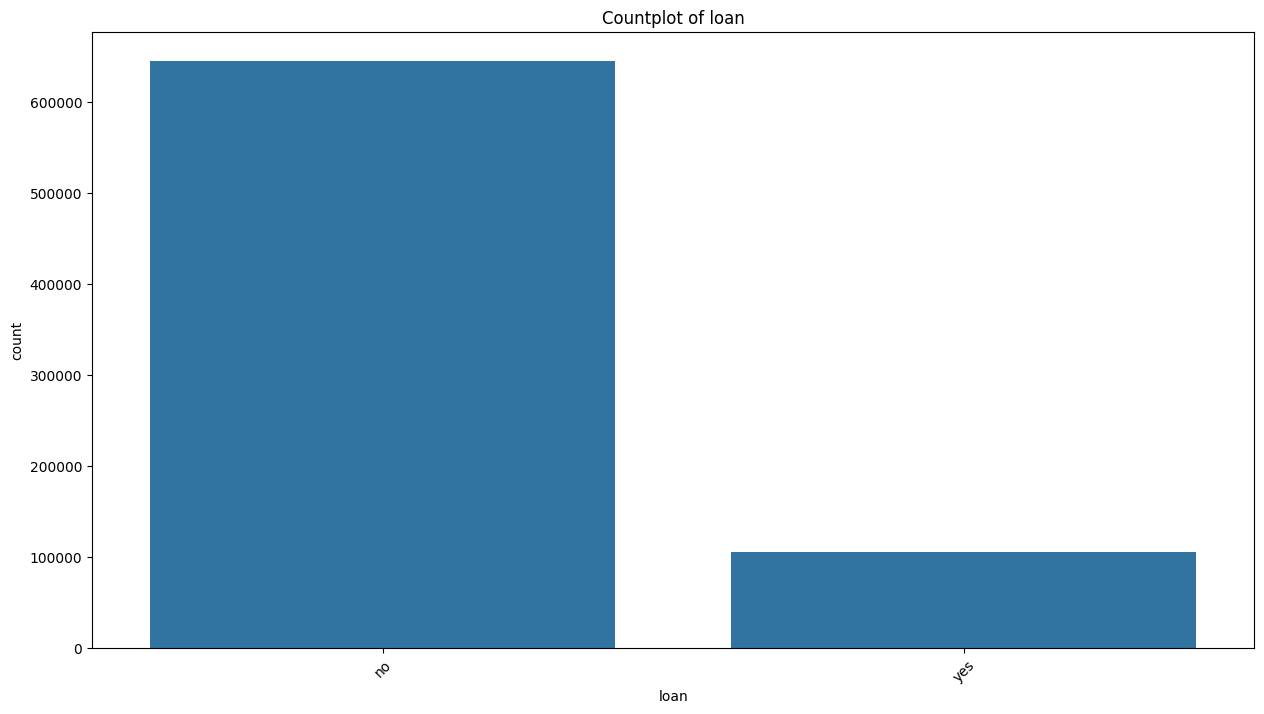

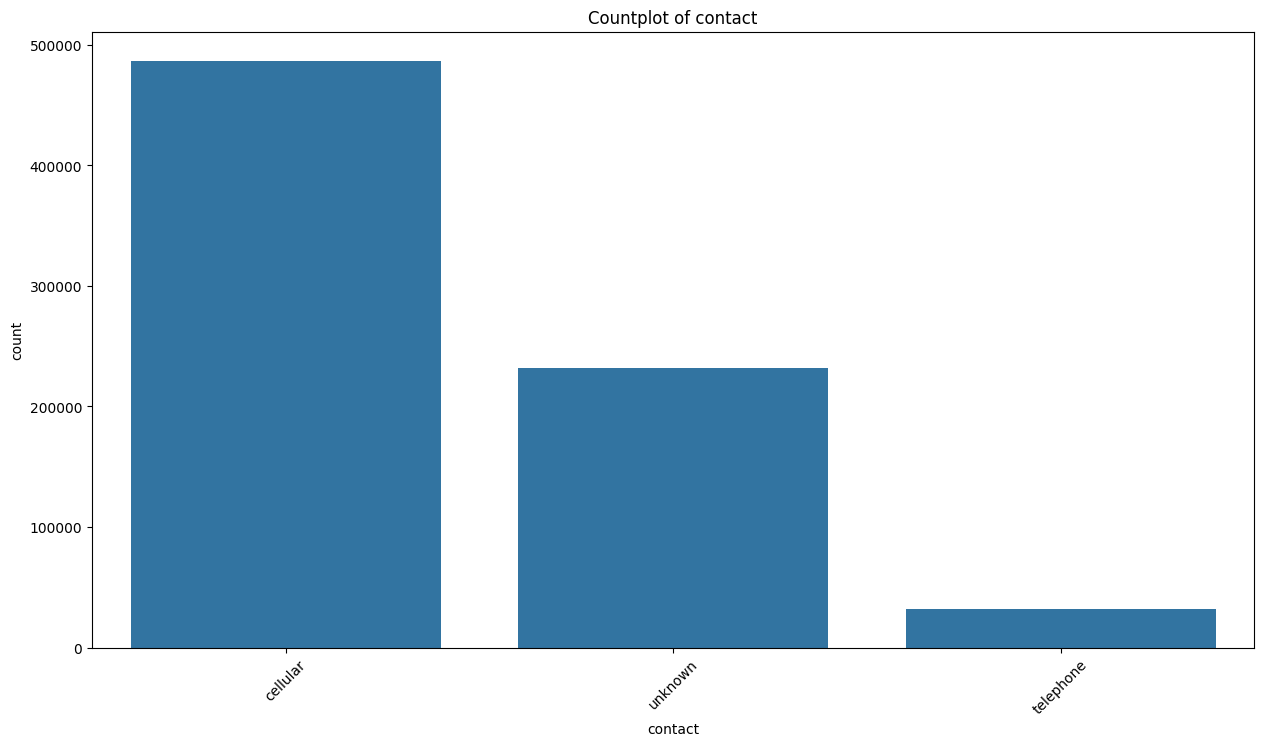

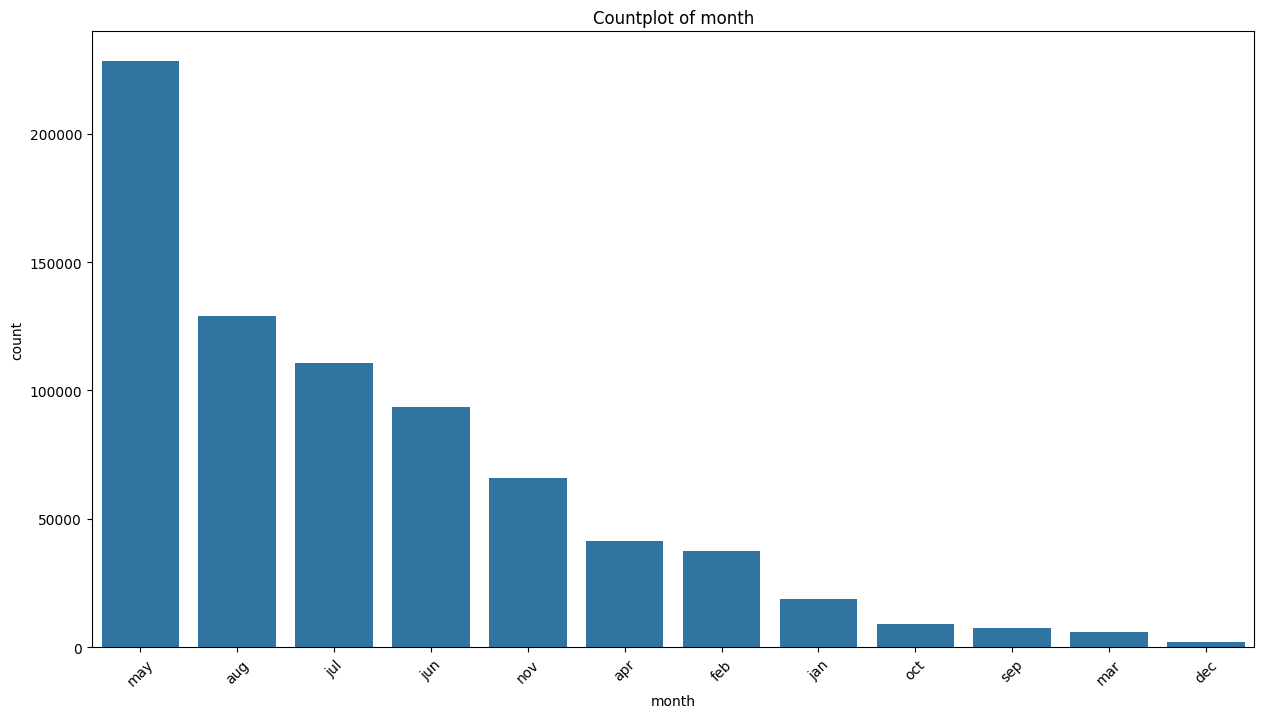

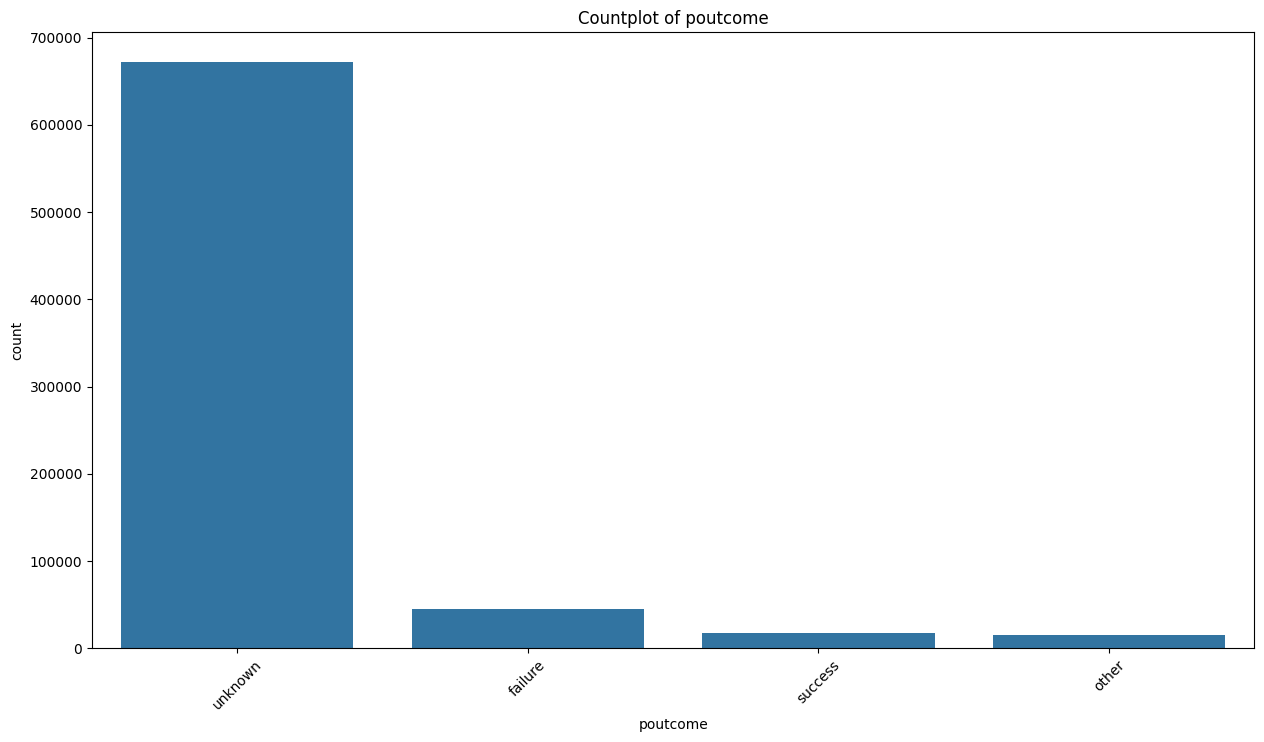

In [14]:
for column in categories:
    plt.figure(figsize=(15, 8))
    sns.countplot(data=df, x=column, order=df[column].value_counts().index)
    plt.title(f'Countplot of {column}')
    plt.xticks(rotation=45)
    plt.show()

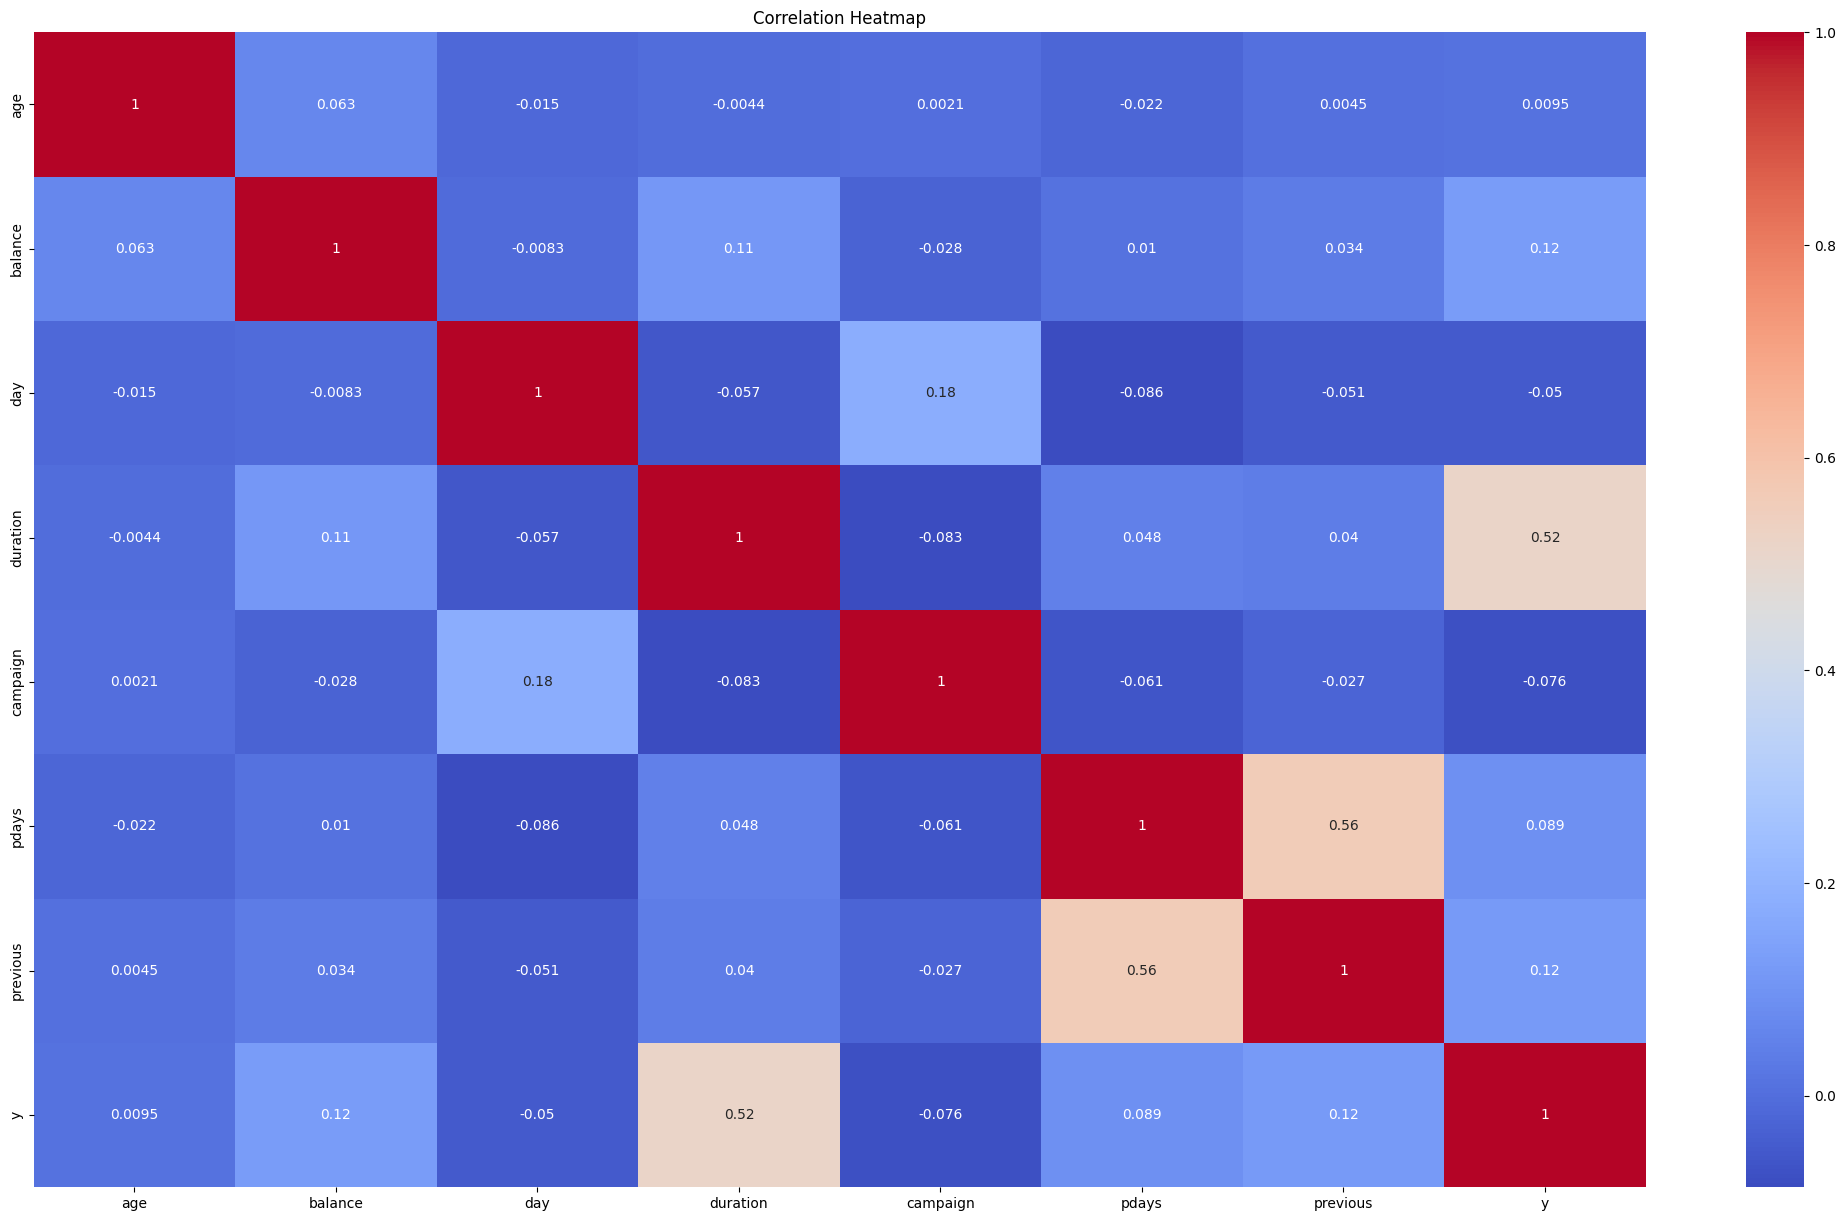

In [15]:
numeric_df = df.select_dtypes(include=["number"])
plt.figure(figsize=(26, 15))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [25]:
from sklearn.preprocessing import LabelEncoder
orig_df = pd.read_csv(os.path.join(base_dir, files[0]))
orig_df["y"] = LabelEncoder().fit_transform(orig_df["y"])
orig_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,1
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,1
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,1
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,0


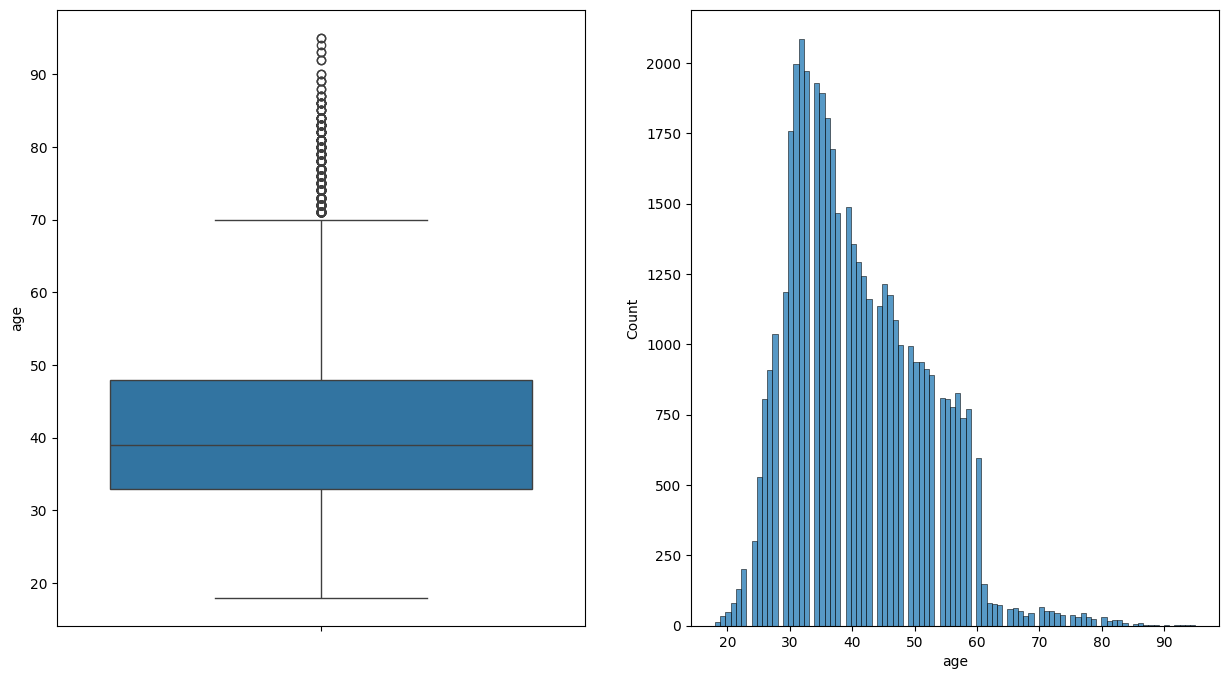

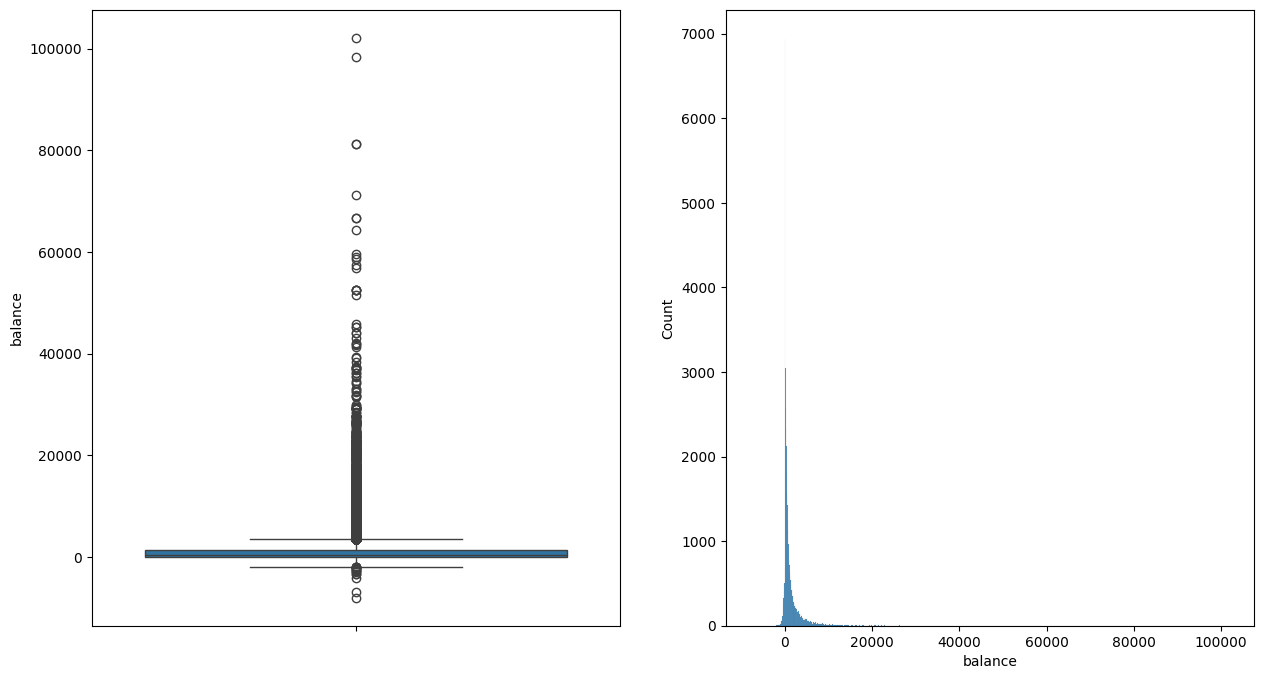

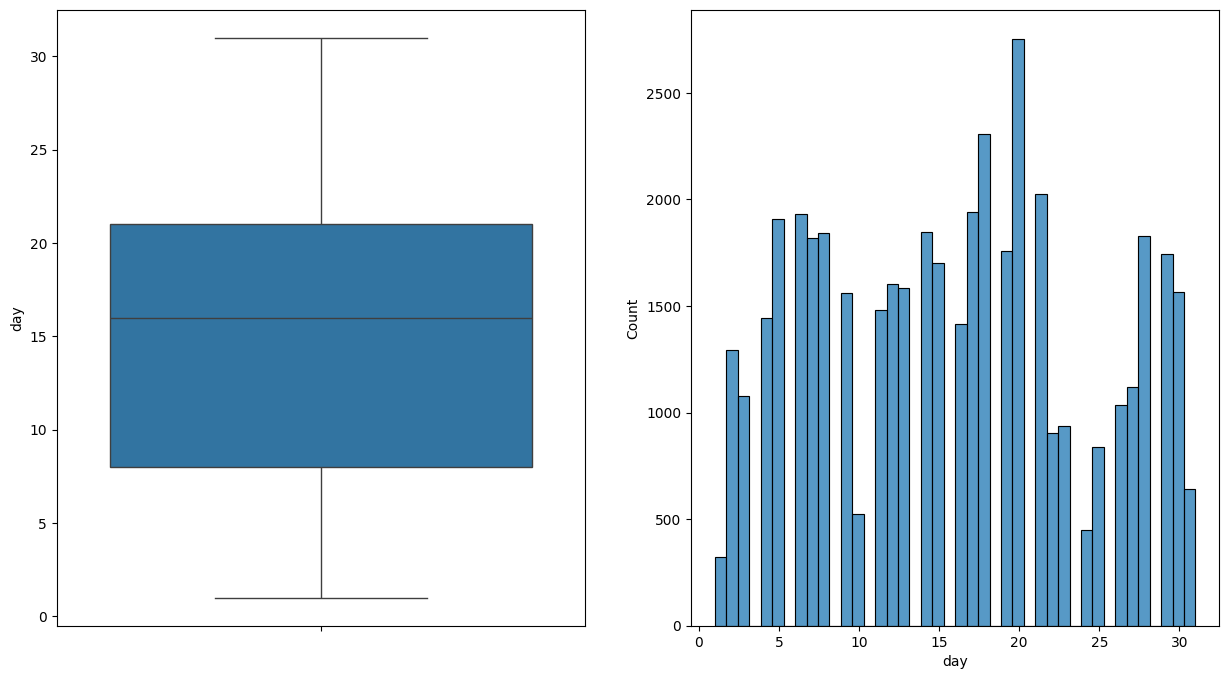

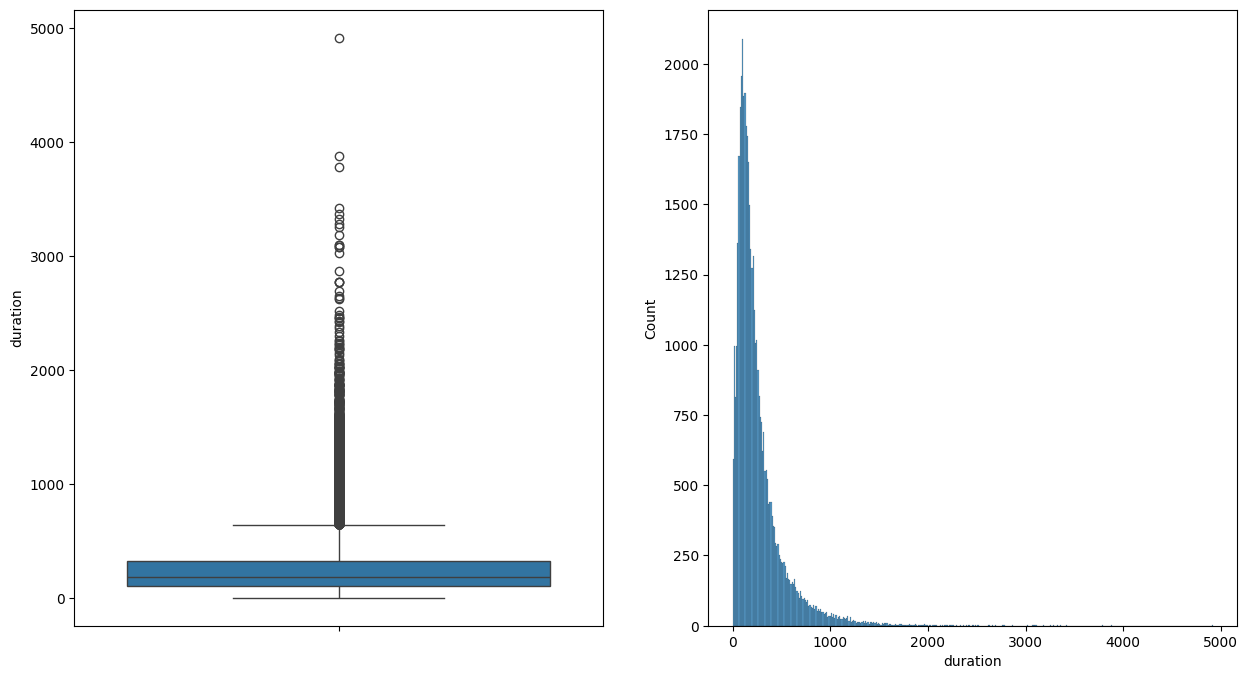

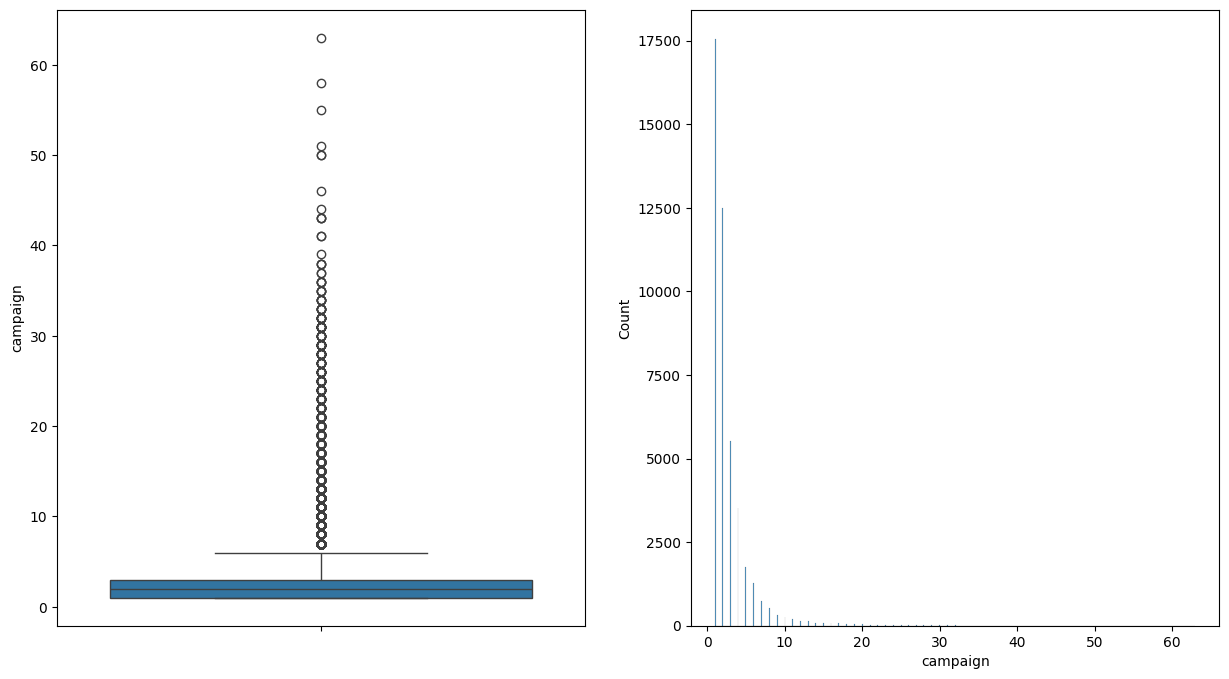

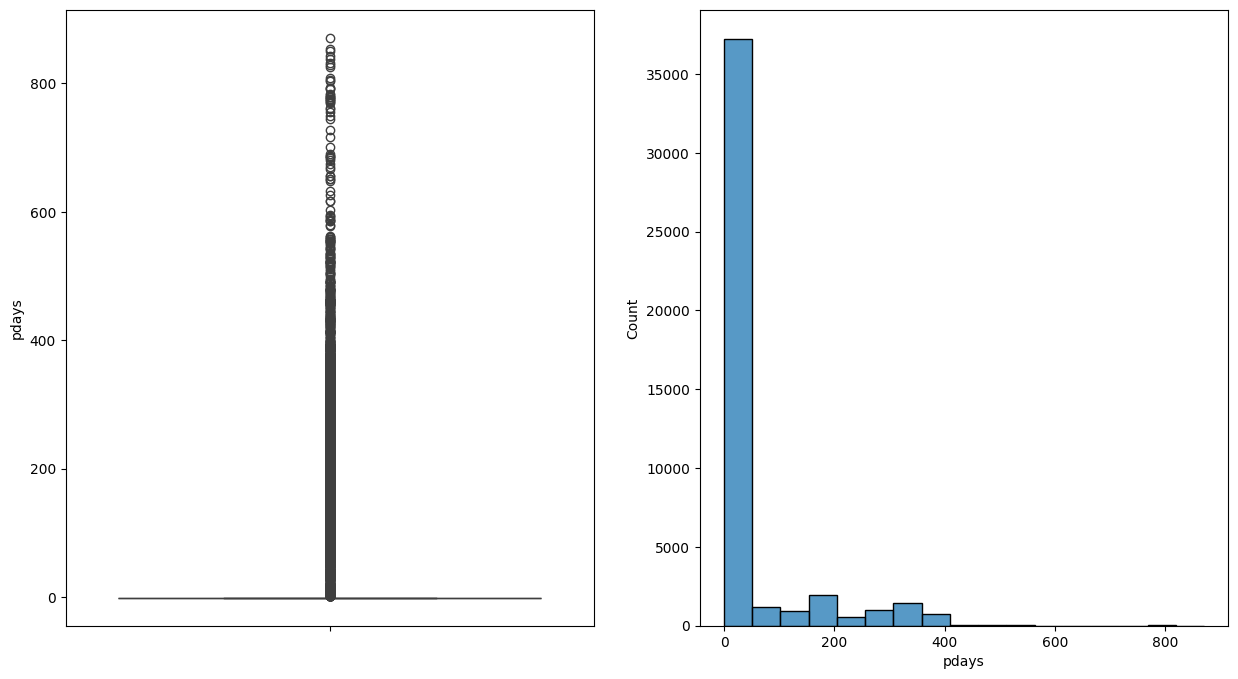

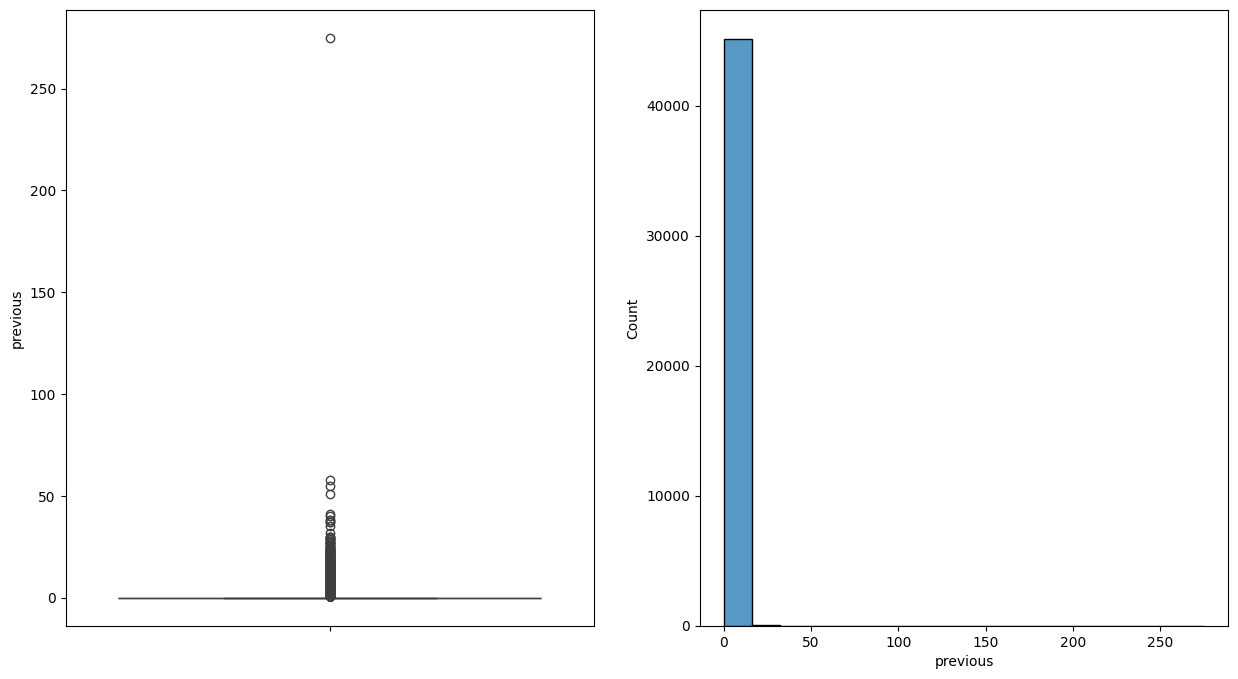

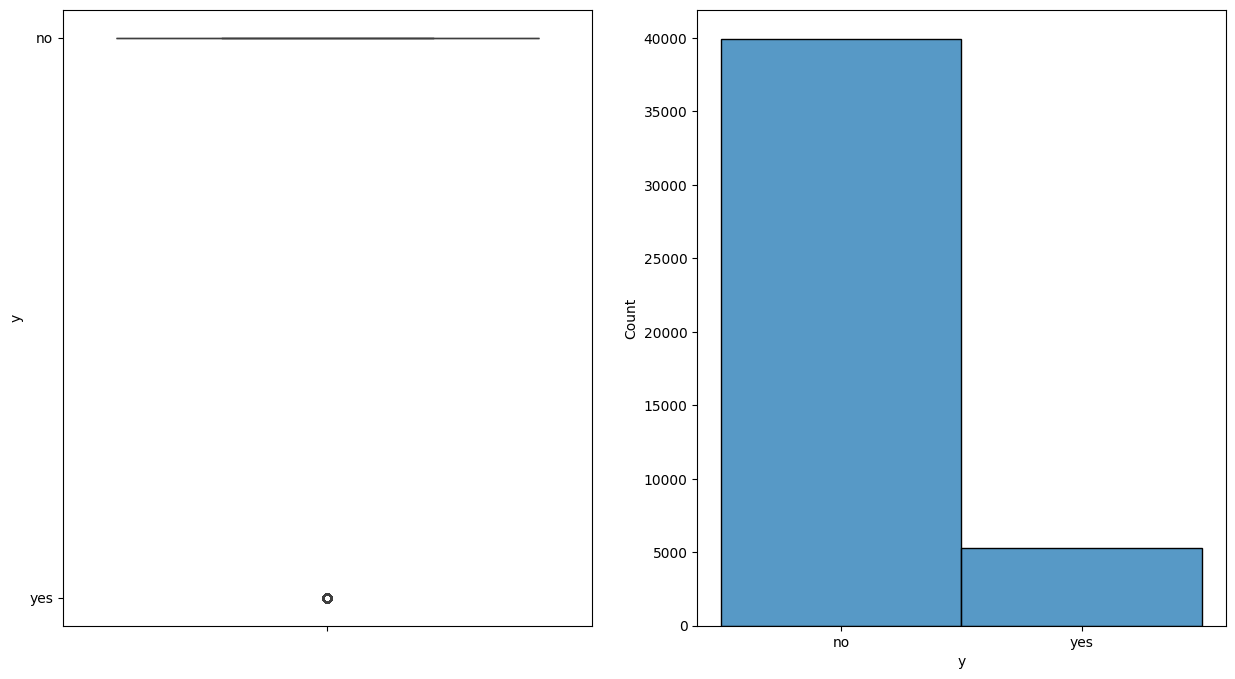

In [20]:
for column in non_categories:
    plt.figure(figsize=(15, 8))
    plt.subplot(1, 2, 1)
    sns.boxplot(data=orig_df, y=column, )
    plt.subplot(1, 2, 2)
    sns.histplot(data=orig_df, x=column, kde=False)
    plt.show()

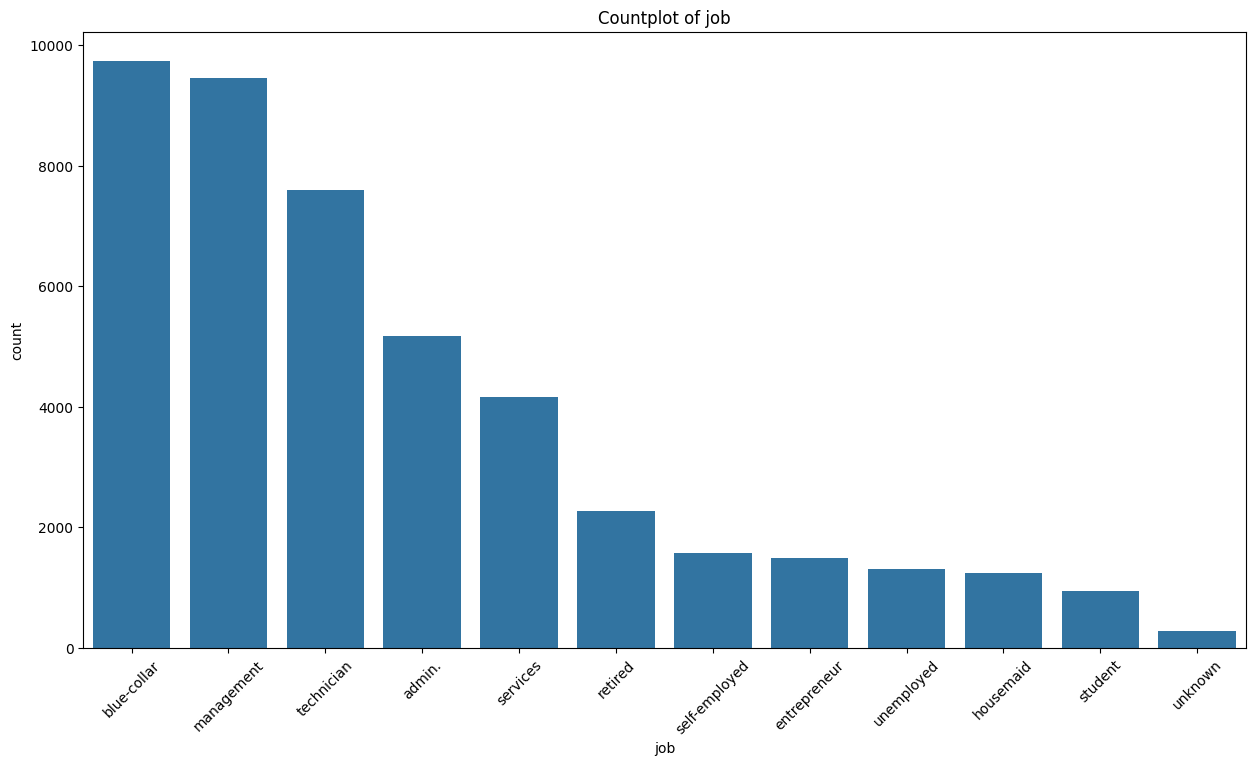

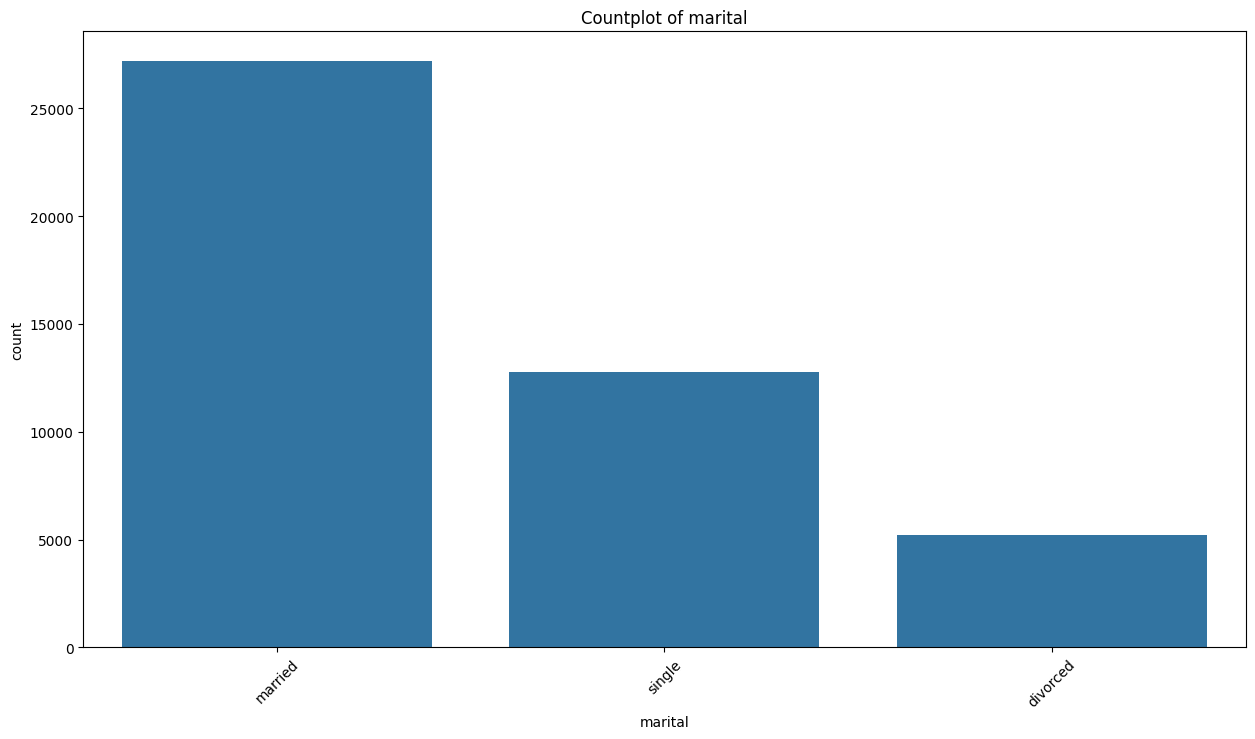

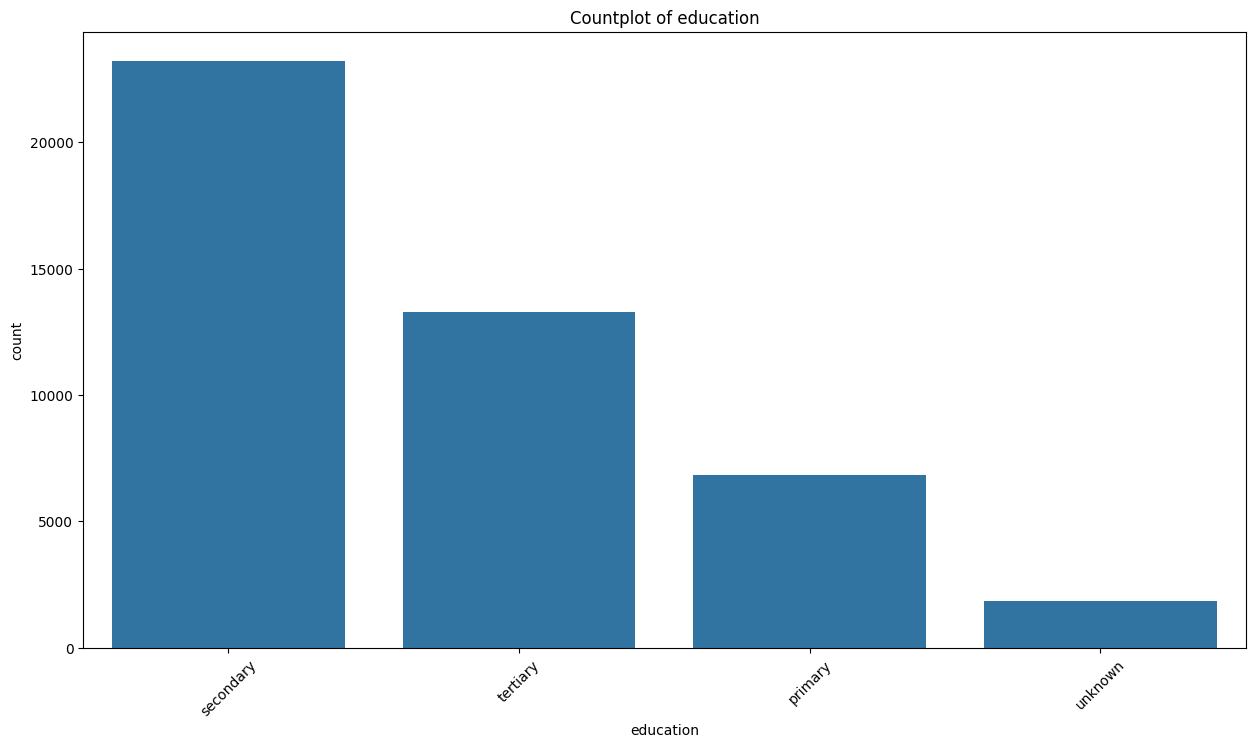

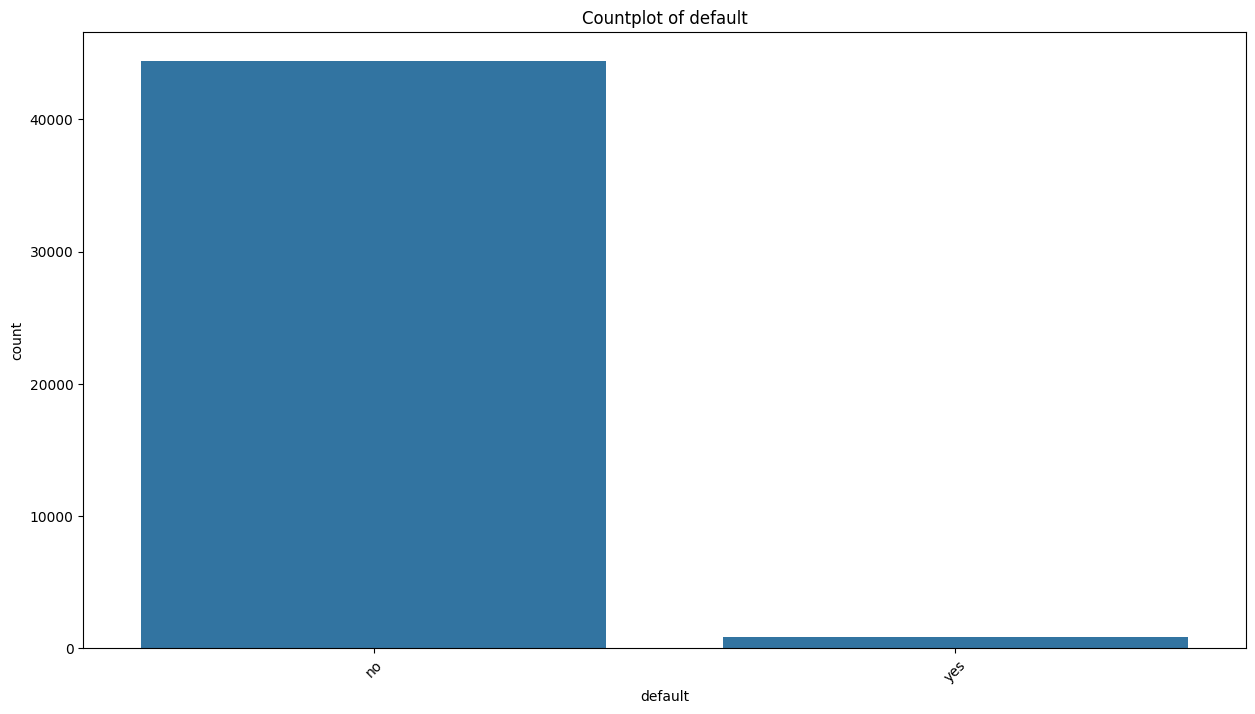

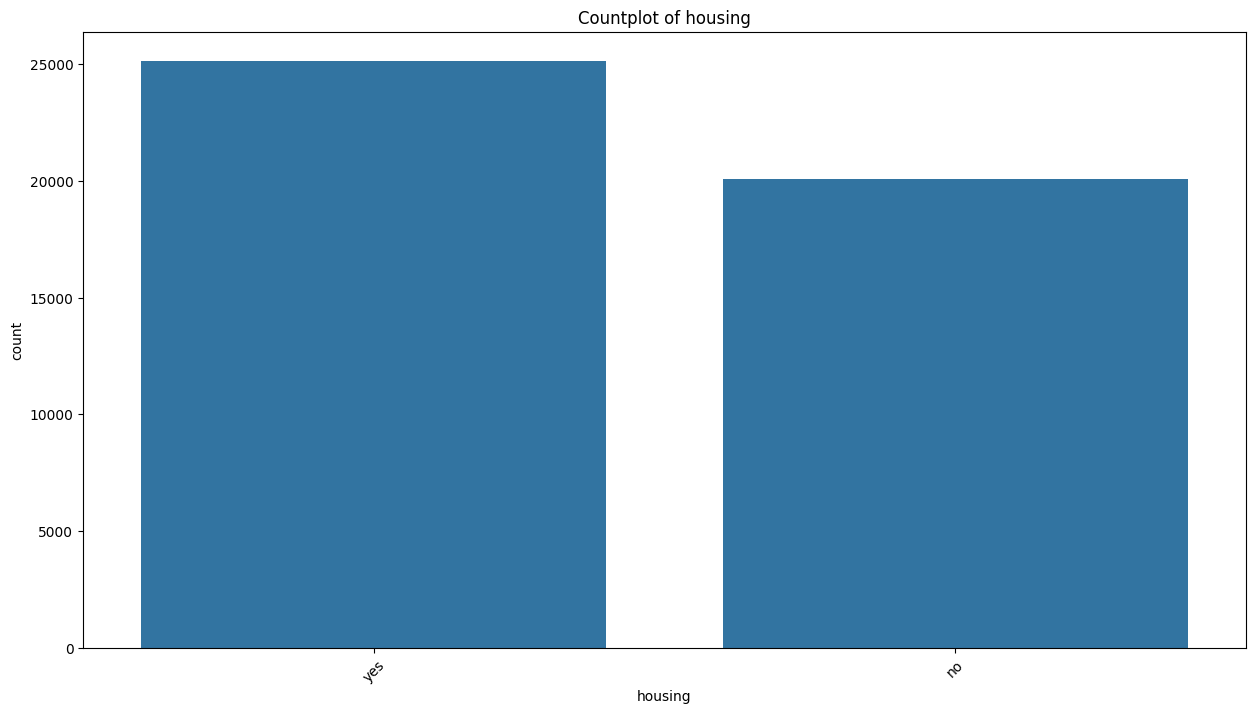

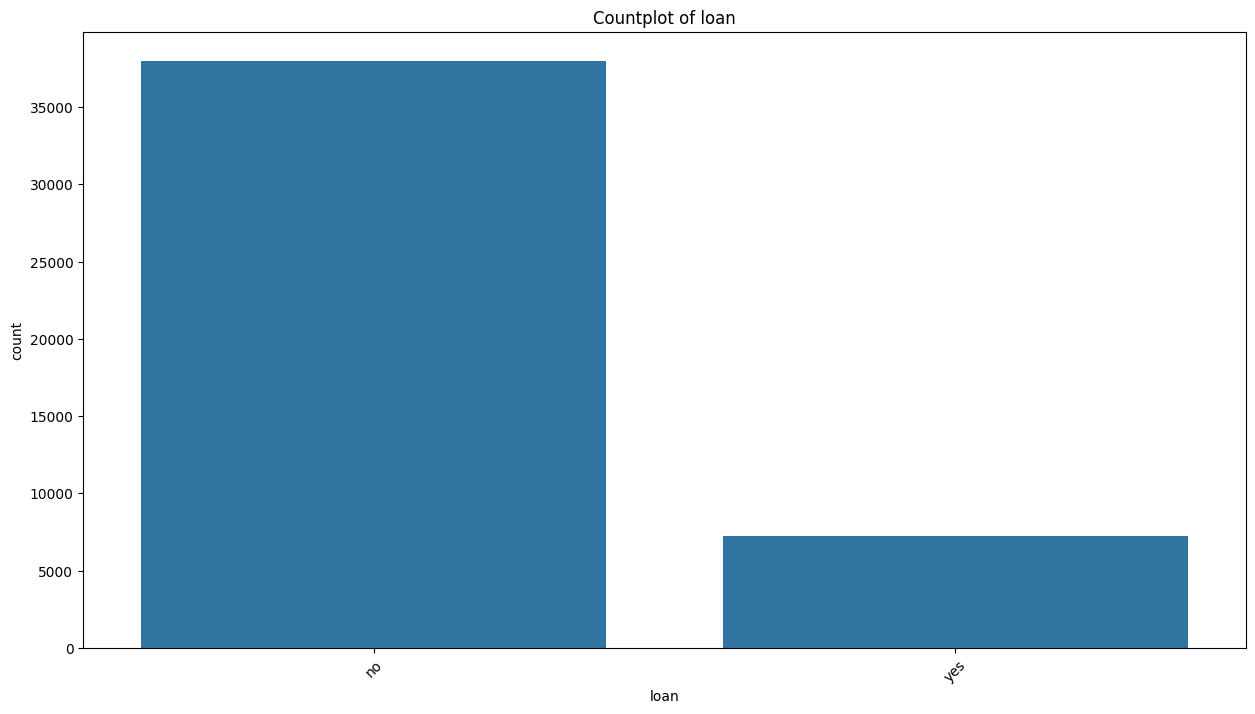

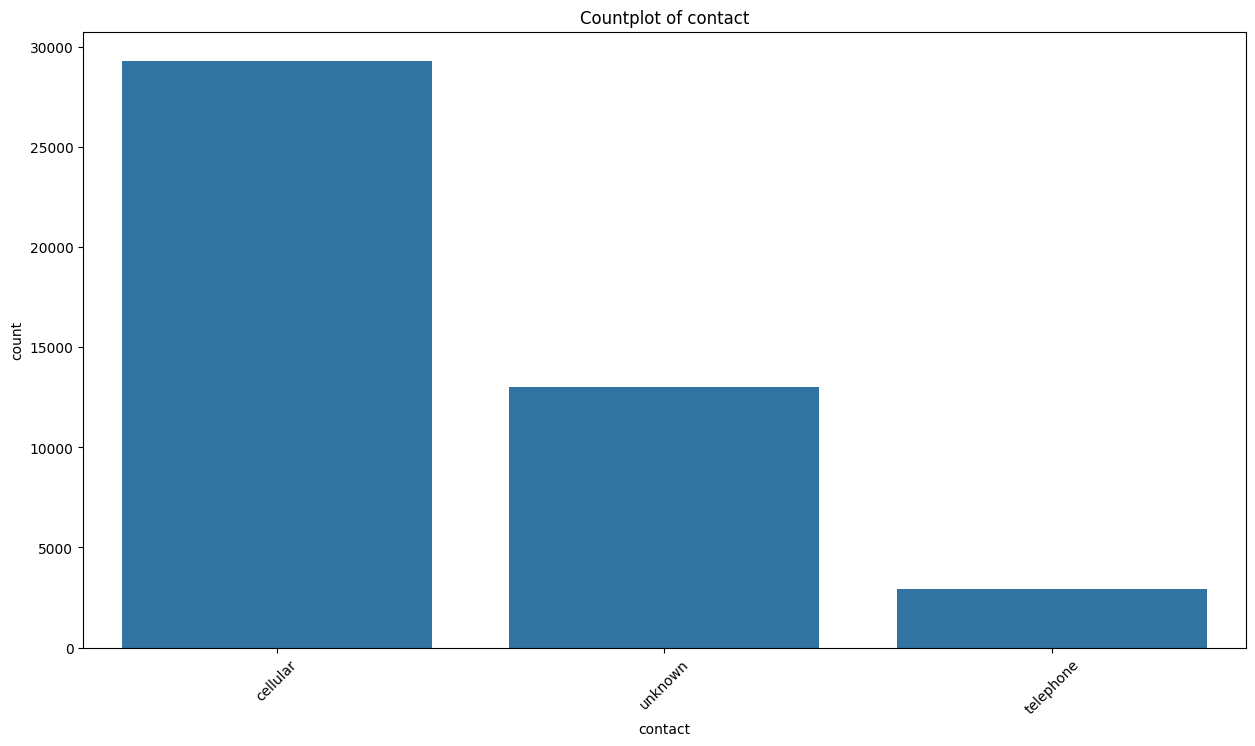

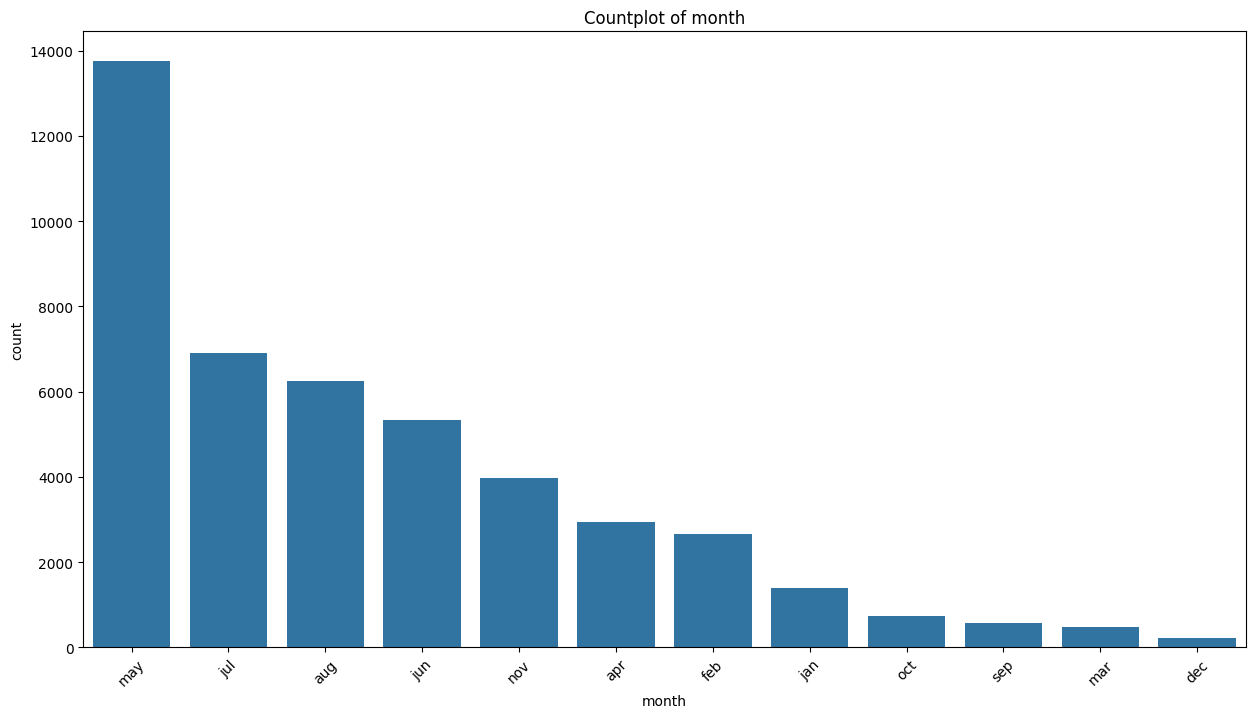

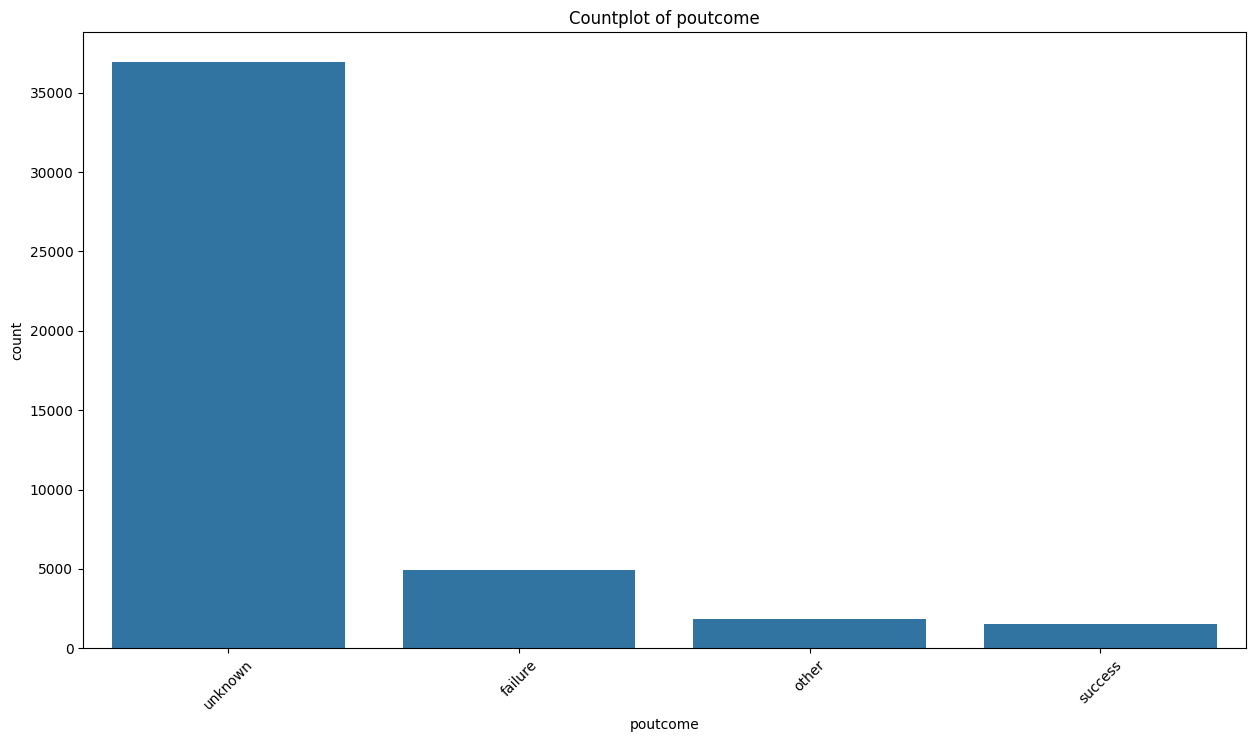

In [22]:
for column in categories:
    plt.figure(figsize=(15, 8))
    sns.countplot(data=orig_df, x=column, order=orig_df[column].value_counts().index)
    plt.title(f'Countplot of {column}')
    plt.xticks(rotation=45)
    plt.show()

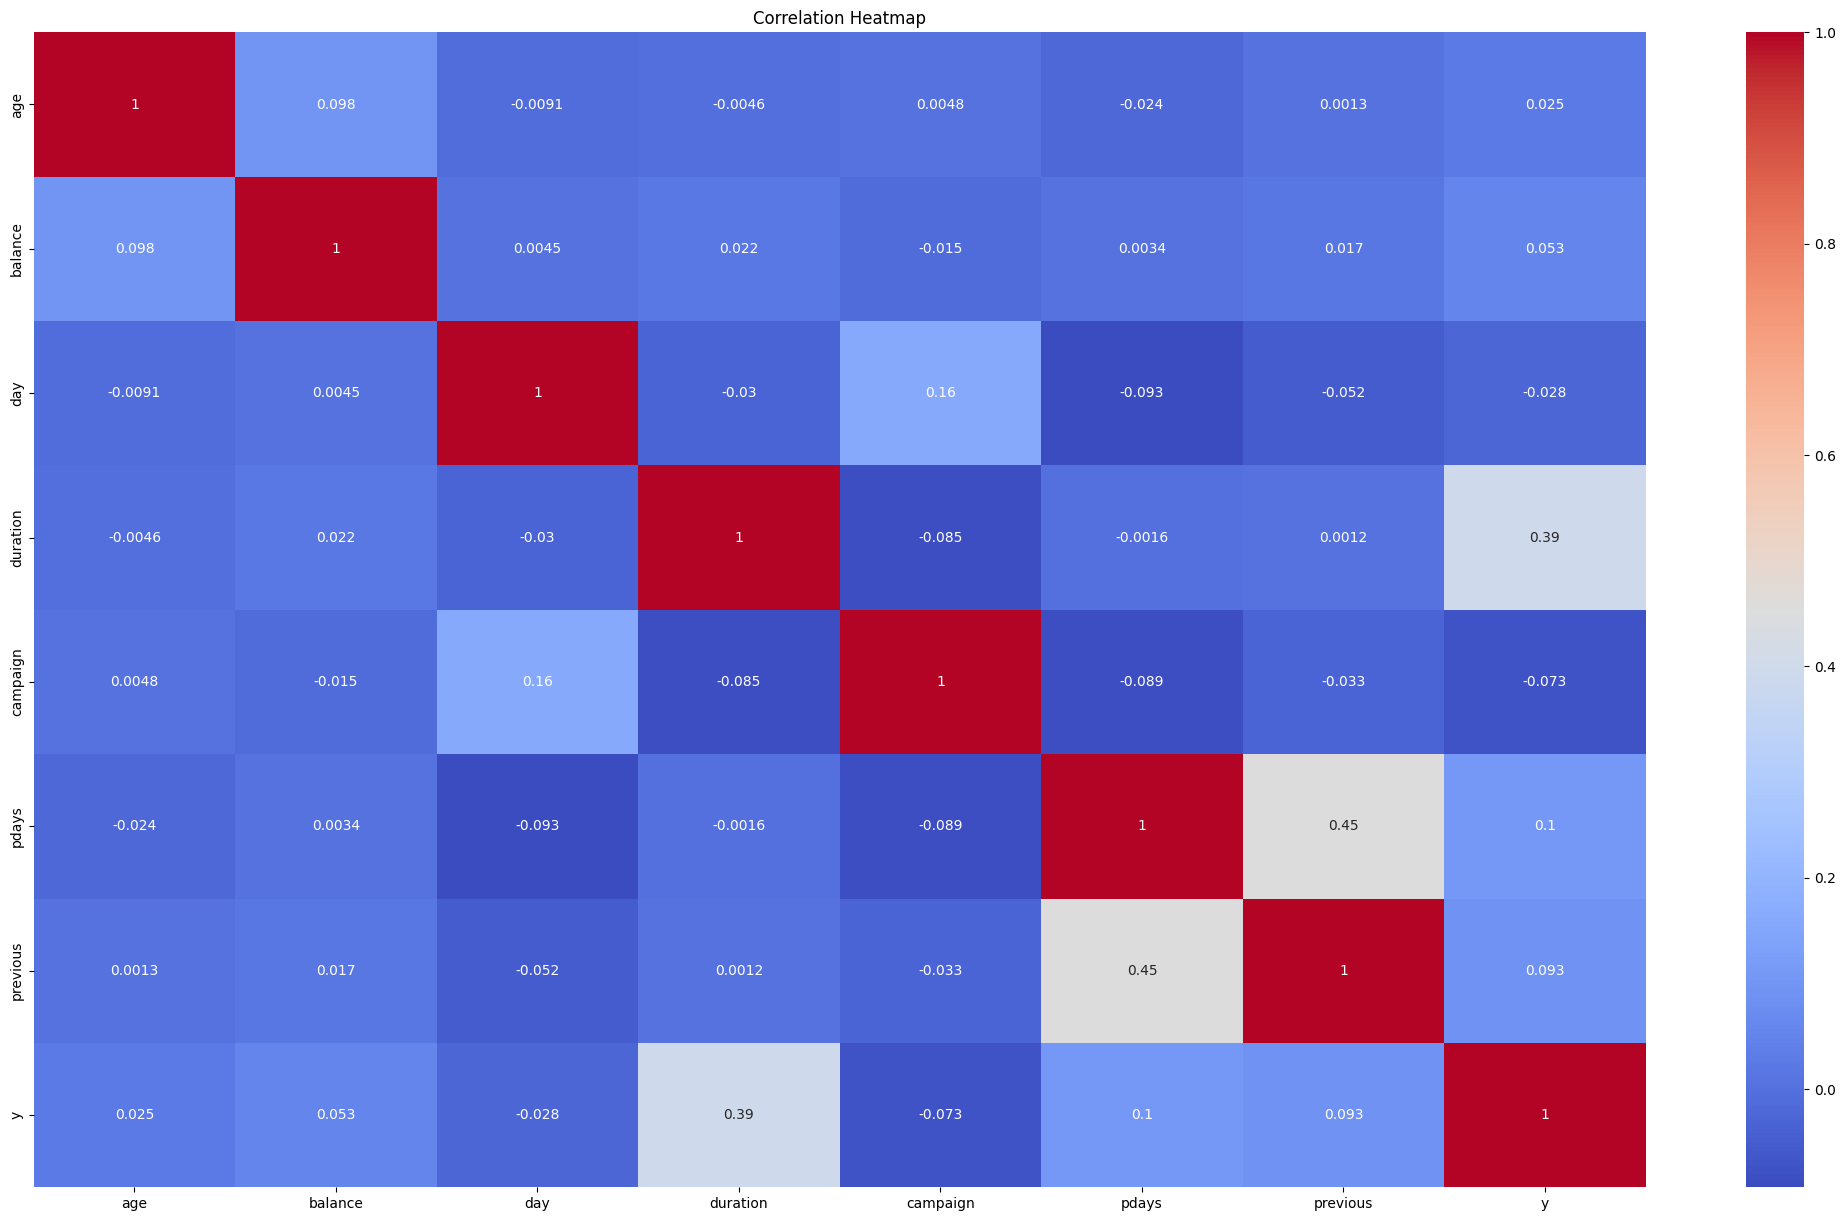

In [26]:
numeric_df = orig_df.select_dtypes(include=["number"])
plt.figure(figsize=(26, 15))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

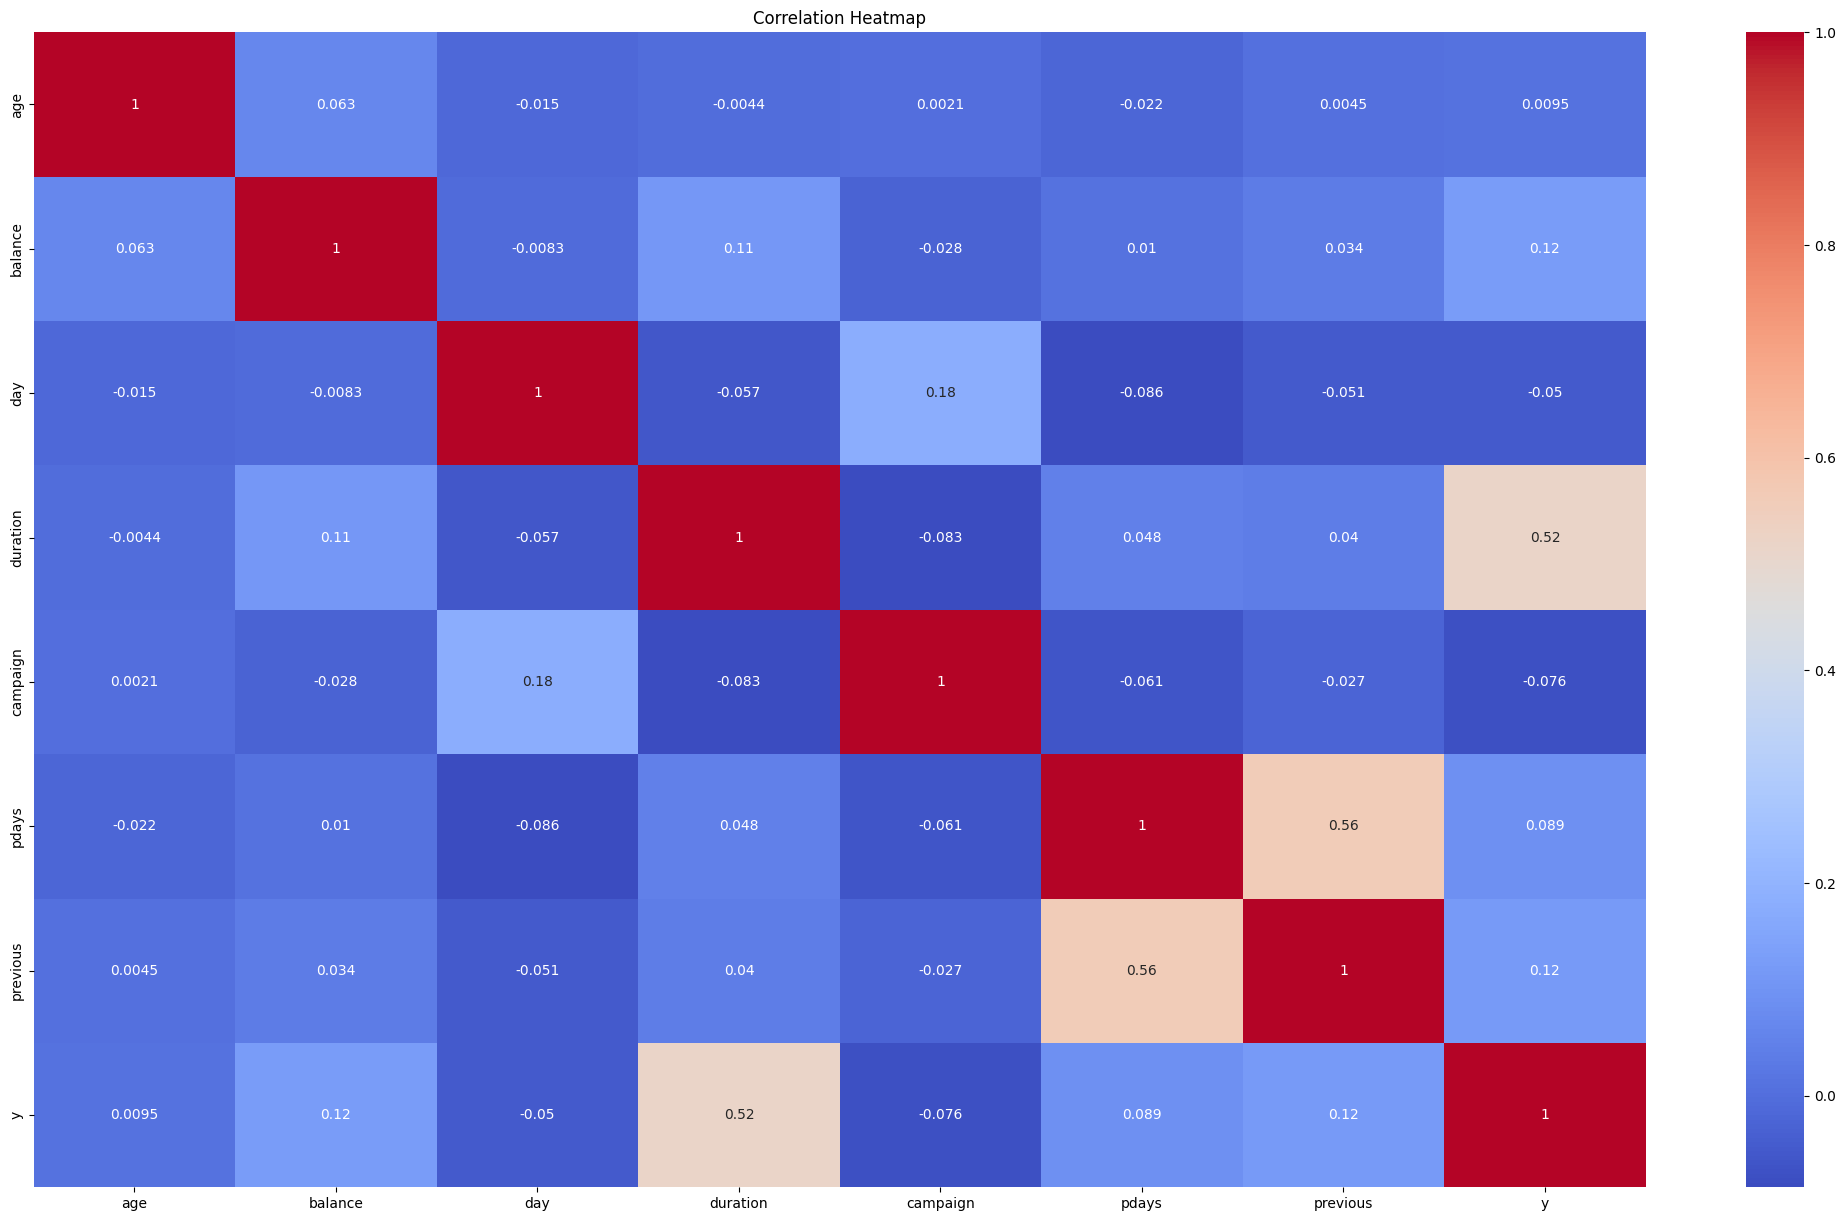

In [24]:
numeric_df = df.select_dtypes(include=["number"])
plt.figure(figsize=(26, 15))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()